<a href="https://colab.research.google.com/github/sindhuja-mulakeri/Mobile-Price-Range-Prediction-ML-Classification-/blob/main/Mobile_Price_Range_Prediction_ML_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size='6px'><font color='Green'>**Project Name**    - <font color='cyan'>Mobile Price Range Prediction

##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Sindhuja S. Mulakeri
##### **Team Member 2 -** Shubham Mishra
##### **Team Member 3 -** Adithi Jain
##### **Team Member 4 -** Devashish Sinha

# **Project Summary -**

The objective of this data science project was to utilize machine learning algorithms to predict the price ranges of mobile phones based on their specifications. The dataset included various features such as battery capacity, RAM, internal memory, camera quality, and other hardware specifications relevant to mobile phones. The dataset was divided into training and testing sets, and several machine learning algorithms, including Logistic Regression, Decision Tree, Random Forest, and Support Vector Machines (SVM), were employed on the training set.

After evaluating the performance of these algorithms, the Random Forest algorithm was selected as the final model due to its high accuracy and F1-score. The project concluded that employing predictive modeling techniques can be an effective approach for detecting the price ranges of mobile phones. It also emphasized the significance of data preprocessing and feature engineering in improving the accuracy of the model.

To summarize, this data science project focused on predicting mobile phone price ranges using machine learning algorithms. The dataset contained various specifications, and after evaluating multiple algorithms, Random Forest was chosen as the best model. The project emphasized the value of data preprocessing and feature engineering to enhance the accuracy of the model and concluded that predictive modeling is a viable approach for mobile price range detection.



# **GitHub Link -**

Sindhuja -   https://github.com/sindhuja-mulakeri/Mobile-Price-Range-Prediction-ML-Classification-.git

Shubham - https://github.com/Shubham-Mishra83/Mobile_Price_Range_Machine_Learning_ClassificationModel

Aditi  - https://github.com/aditijain22/MachineLearning_Mobile_Price_Range_Prediction

Devashish -https://github.com/devashish0211/Mobile-Price-Range-Prediction-ML-Classification

# **Problem Statement**


In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

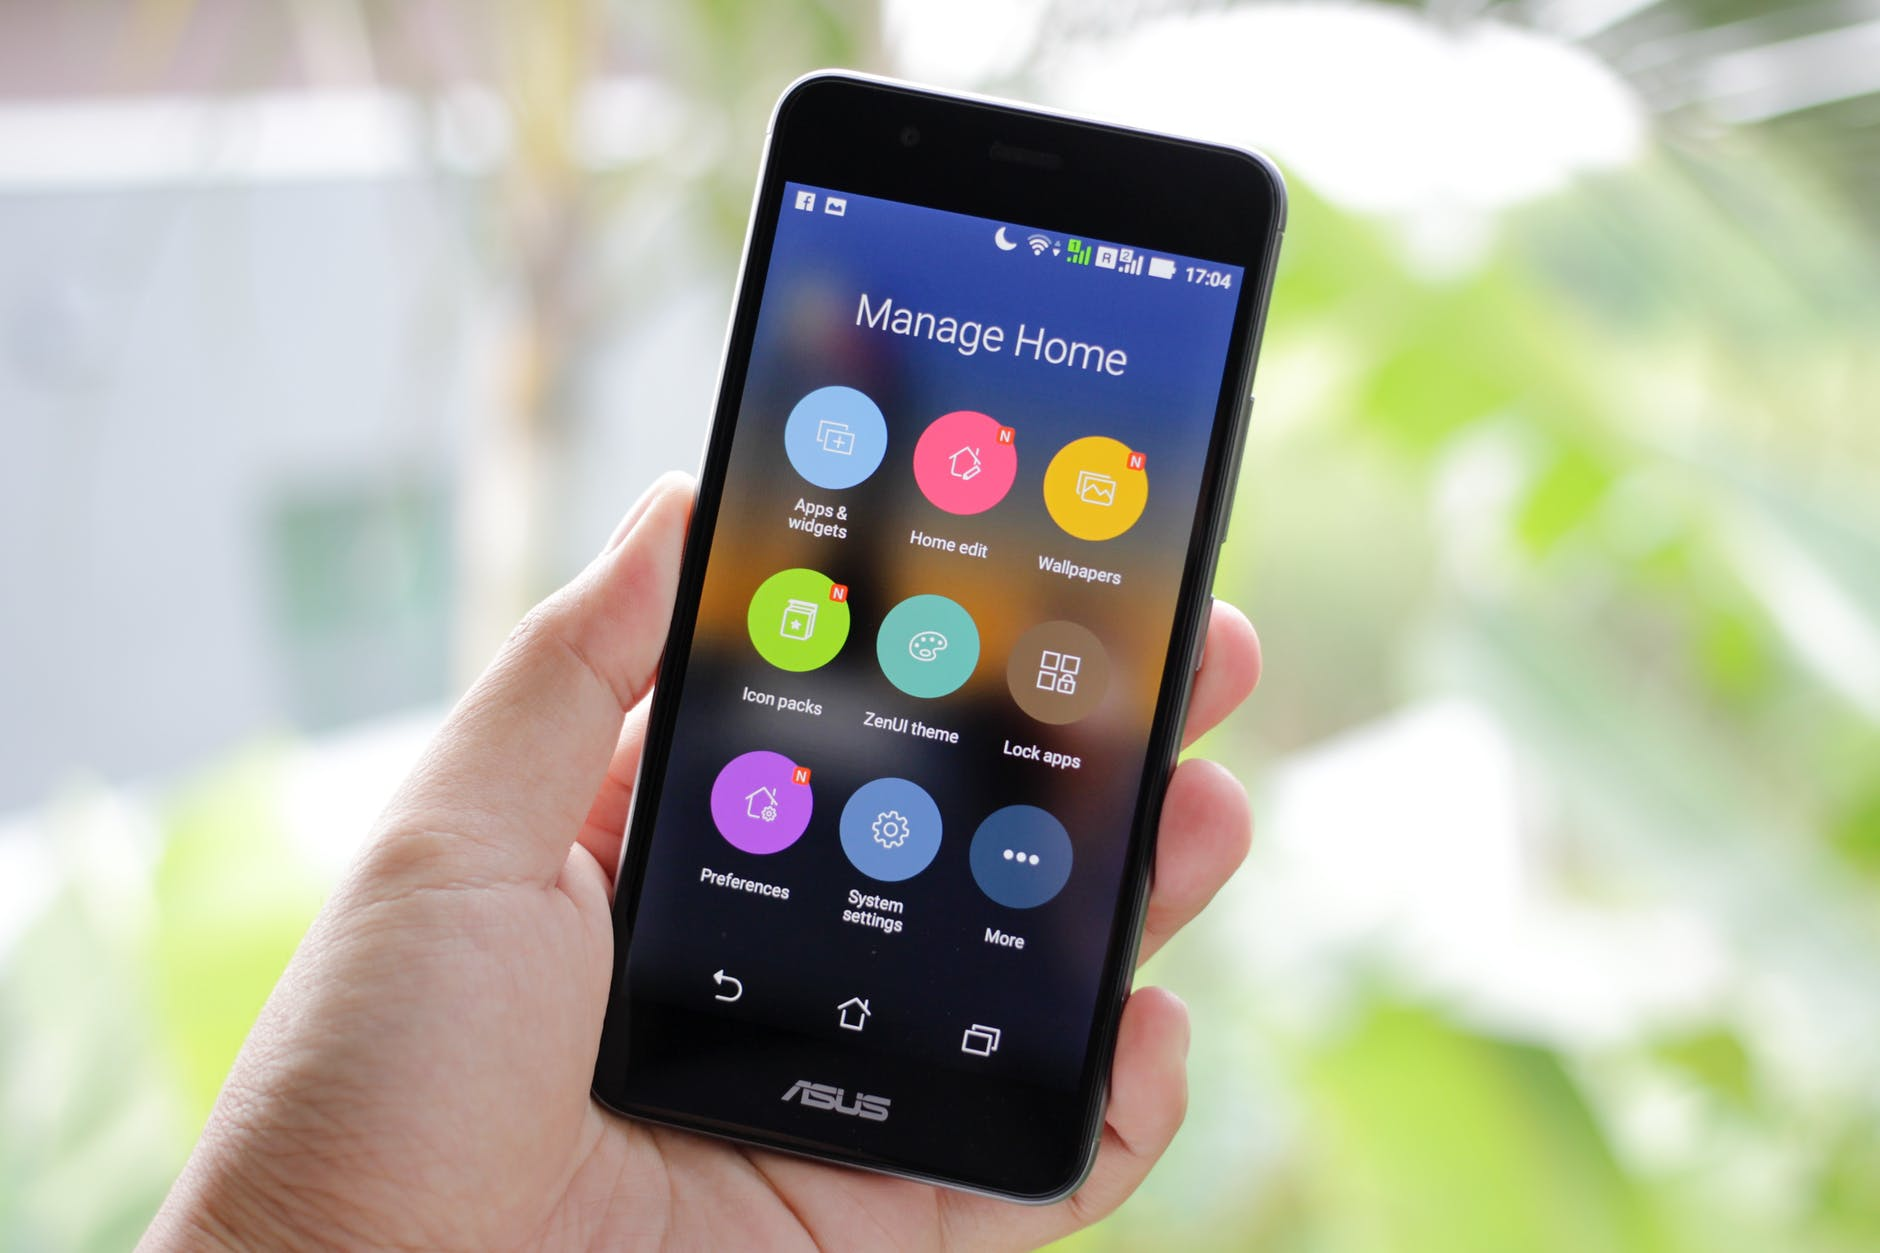

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
!pip install --upgrade scikit-learn
import pandas as pd
import numpy as np
from numpy import loadtxt
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# import lime
# import lime.lime_tabular
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble  import  BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble  import  VotingClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.svm import SVC
import xgboost
from sklearn.ensemble import StackingClassifier



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/data_mobile_price_range.csv')


### Dataset First View

In [4]:
# Dataset First Look
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
#dataset last 5 rows
dataset.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
dataset.shape
print(f'Total Rows = {dataset.shape[0]}\nTotol Columns={dataset.shape[1]} ')

Total Rows = 2000
Totol Columns=21 


### Dataset Information

In [7]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
dataset.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

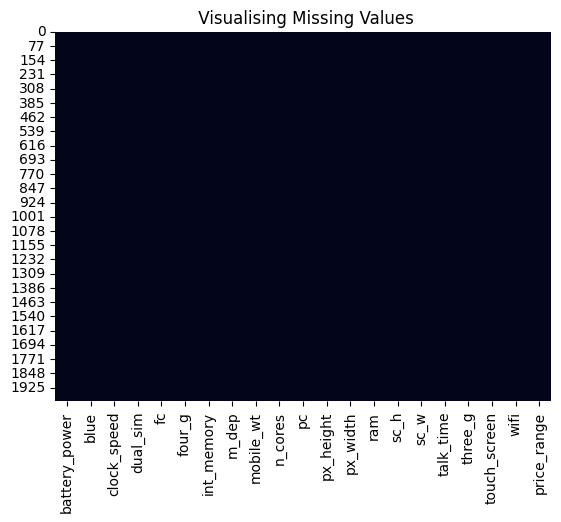

In [10]:
# Visualizing the missing values
sns.heatmap(dataset.isnull(), cbar=False);
plt.title(" Visualising Missing Values")

### What did you know about your dataset?

The data contains information regarding mobile phone features, specifications etc and their price range. The various features and information can be used to predict the price range of a mobile phone.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [12]:
# Dataset Describe
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Some Basic Observations:

It has been observed that in the dataset, both the screen width (sc_width) and pixel height (px_height) have a minimum value of 0. This is not a valid value for these features as no mobile phone can have a screen width or pixel height of 0. Therefore, it is necessary to address and rectify this error in the dataset.

In [13]:
# Checking How many observations having screen width value as 0.
print(dataset[dataset['sc_w']==0].shape[0])

180


In [14]:
# Checking How many observations having px_hieght value as 0.
print(dataset[dataset['px_height']==0].shape[0])

2


In [15]:
#replacing zero in sc_W and px_height with  mean values
dataset.loc[dataset['sc_w'] == 0, 'sc_w'] = dataset['sc_w'].mean()
dataset.loc[dataset['px_height'] == 0, 'px_height'] = dataset['px_height'].mean()

### Variables Description

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_heig Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1 (medium cost), 2(high cost) and 3(very high cost).

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
dataset.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## 3. ***EDA( Exploratory Data Analysis)***

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It involves examining and understanding the dataset to gain insights, identify patterns, and uncover relationships between variables. EDA helps in formulating hypotheses, selecting appropriate techniques, and preparing the data for further analysis.

**1. Let's have look at target variable first. i.e PRICE RANGE**

In [17]:
# lets have look at our target variable's counts
price_range_values=dataset['price_range'].value_counts()
price_range_values


1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

Impressively, we observe a nearly equal distribution of observations across all categories in our target variable. Hence, we do not encounter an imbalanced target variable issue. Consequently, the accuracy score would serve as an appropriate evaluation metric for selecting the model.

The target variable is categorized as follows:

0: Low cost

1: Medium cost

2: High cost

3: Very high cost

This categorization allows us to assess the price range of mobile phones accurately.

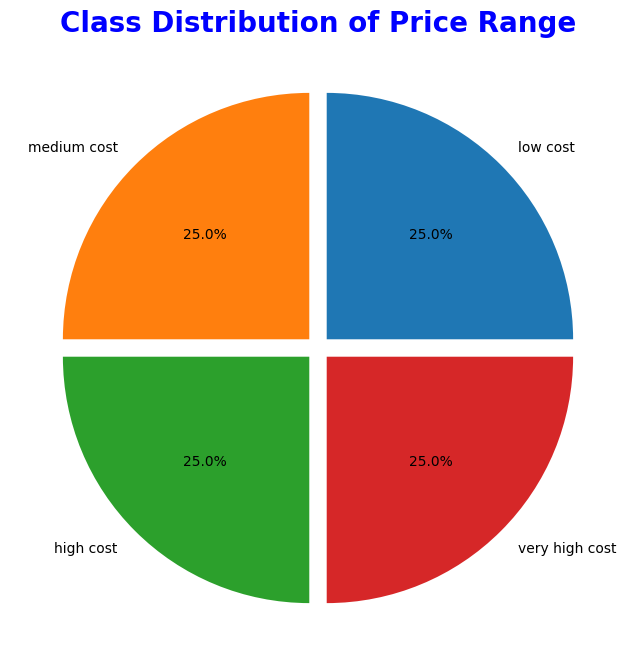

In [18]:
# Visualizing the Target variable's class distribution.
labels = ["low cost", "medium cost", "high cost", "very high cost"]
explode = [0.05] * 4
fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(price_range_values, explode=explode, labels=labels, autopct='%1.1f%%')
ax.set_aspect('equal')  # Ensure pie is drawn as a circle
ax.set_title("Class Distribution of Price Range",size=20,fontweight='bold',color='blue')
plt.show()

The equal distribution of our target variable indicates that we do not have to be concerned about data imbalance. Therefore, there is no need for oversampling or undersampling techniques. This balanced distribution is advantageous for our analysis, as it ensures that each class is adequately represented in the dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **1.We will explore the relationship between RAM, battery power, pixel height (px_height), and pixel width (px_width) variables.**

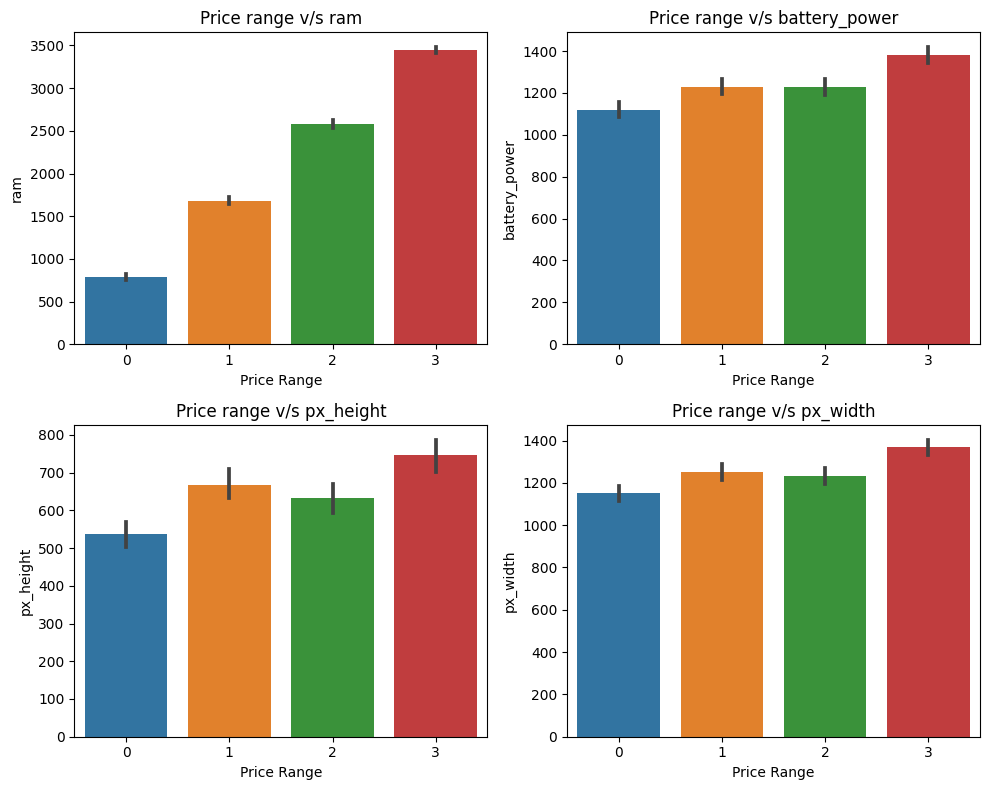

In [19]:
# plotting  price_range vs other fearures
labels = ['0=low_cost', '1=medium_cost', '2=high_cost', '3=very_high_cost']
variables = ['ram', 'battery_power', 'px_height', 'px_width']
num_plots = len(variables)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for i, var in enumerate(variables):
    ax = axes[i // 2, i % 2]
    sns.barplot(x=dataset['price_range'], y=dataset[var], ax=ax)
    ax.set_title(f'Price range v/s {var}')
    ax.set_xlabel('Price Range')
    ax.set_ylabel(var)

plt.tight_layout()
plt.show()


**OBSERVATION**

1.Mobile phones with RAM greater than 3000MB are categorized as very high cost. There is a positive correlation between RAM and price range.(as RAM increases price range also incresing).

2.Mobile phones with RAM less than 1000MB are categorized as low cost.

3.Mobile phones with battery power exceeding 1300mAh are classified as very high cost. Those with battery power between 1200 and 1300mAh fall into the medium and high cost categories.

4.Mobile phones with a pixel height of more than 700 and a pixel width of over 1300 are associated with very high cost.

####**2. Performing univariate analysis on categorical columns.**

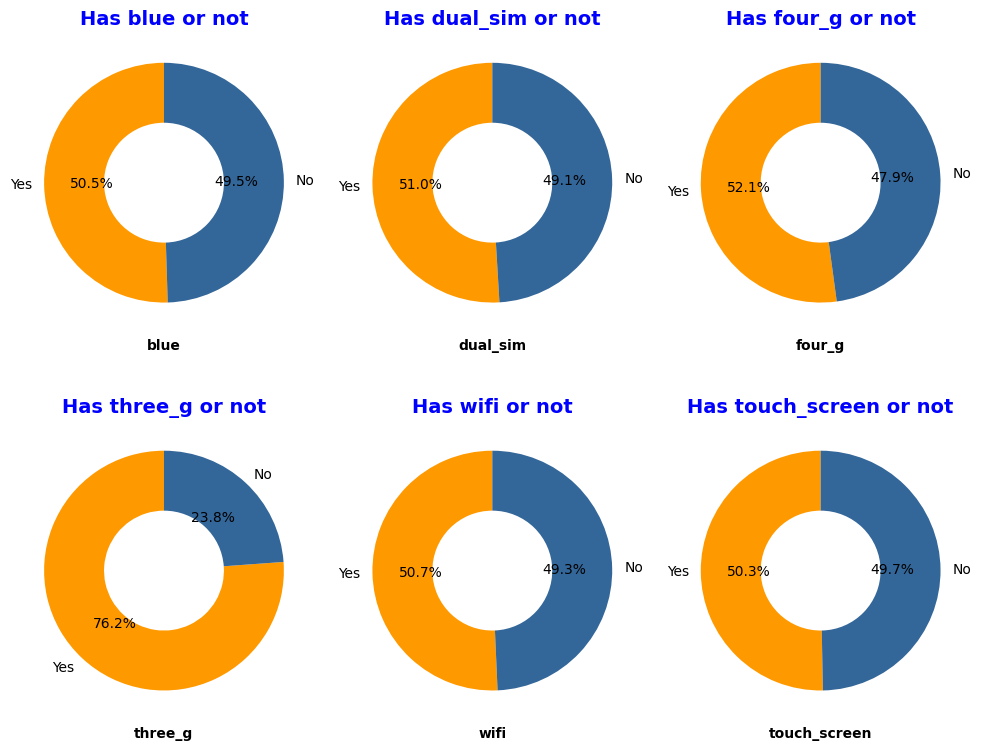

In [20]:
#To visualize the binary categorical variables using a stacked donut chart
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,8))

var_list = ['blue', 'dual_sim', 'four_g', 'three_g', 'wifi', 'touch_screen']
labels = ['Yes', 'No']
colors = ['#FF9900', '#336699']

for i, var in enumerate(var_list):
    ax = axes[i // 3, i % 3]
    data_counts = dataset[var].value_counts()
    ax.pie(data_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.5})
    ax.set_title(f'Has {var} or not', fontsize=14,color='blue',fontweight='bold')
    ax.set_xlabel(var,fontweight='bold')


plt.tight_layout()
plt.show()



**OBSERVATION**

Based on the above chart, the following observations can be made regarding the presence or absence of certain specifications:

1. A value of yes indicates that the mobile device has the corresponding specification, while a value of No indicates that it does not have that specification.

2. The percentage distribution of mobiles having Bluetooth, dual SIM, 4G, Wi-Fi, and touchscreen features is approximately 50%, indicating that these specifications are relatively common among the mobile devices in the dataset.

3. It is worth noting that a small percentage (23.8%) of mobiles do not have the Three_g specification, suggesting that the majority of devices in the dataset possess this feature.





####**Count of phones in each price range with supported or not supported mobile specifications.**

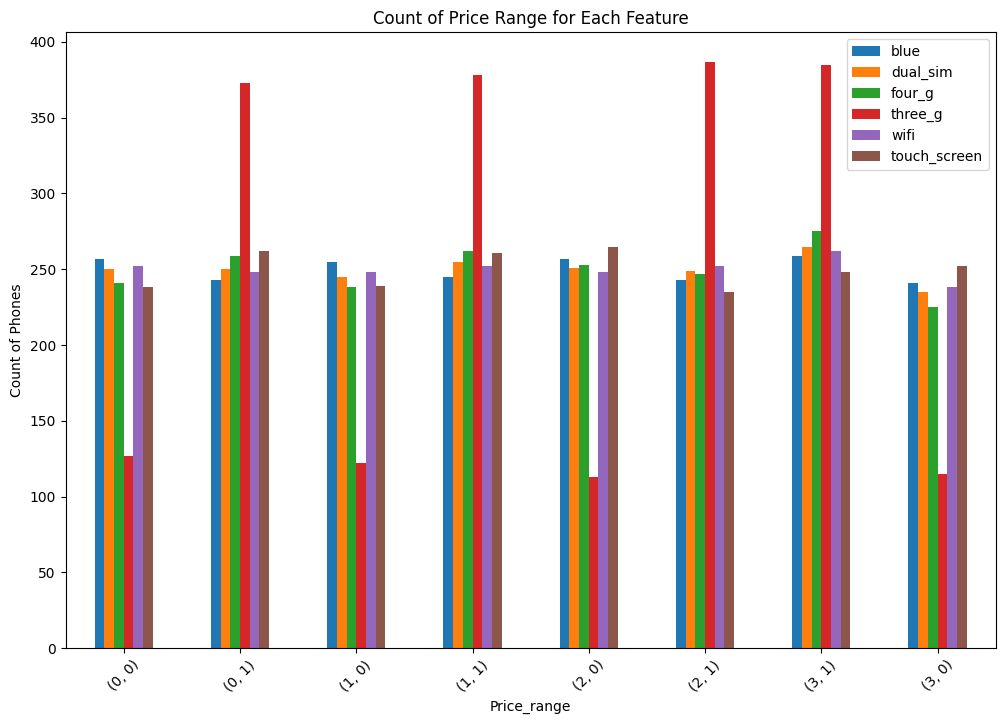

In [21]:
# Group the data by each feature and calculate the count of each price range
price_count = price_count = dataset.groupby(['price_range']).agg({'blue':'value_counts', 'dual_sim':'value_counts', 'four_g':'value_counts', 'three_g':'value_counts','wifi':'value_counts', 'touch_screen':'value_counts'})
# Plotting the count of price range for each feature
price_count.plot.bar(figsize=(12,8))
plt.xlabel('Price_range')
plt.ylabel('Count of Phones')
plt.title('Count of Price Range for Each Feature')
plt.xticks(rotation=45)
plt.legend()
plt.show()



It can be observed that each price range category has an equal number of mobile phones, regardless of whether they have supporting or non-supporting specifications.

####**3. percentage distribution of phones based on their specifications**

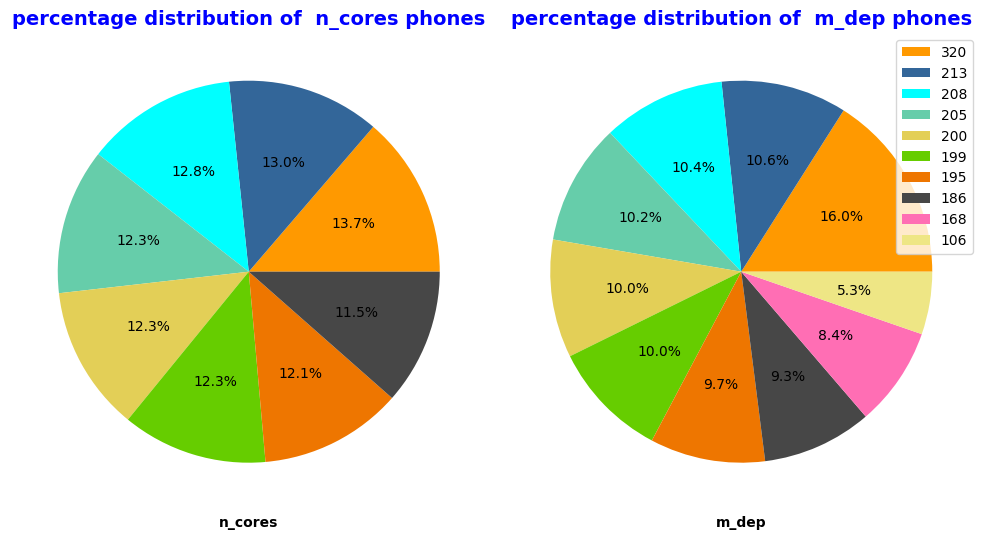

In [22]:
#percentage distribution of phones based on their specifications of plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,8))
var_list = ['n_cores','m_dep']
colors = ['#FF9900', '#336699','#00FFFF','#66CDAA','#E3CF57','#66CD00','#EE7600','#474747','#FF6EB4','#EEE685']

for i, var in enumerate(var_list):
    ax = axes[i]
    data_counts = dataset[var].value_counts()
    ax.pie(data_counts, colors=colors, autopct='%1.1f%%')
    ax.set_title(f'percentage distribution of  {var} phones', fontsize=14,color='blue',fontweight='bold')
    ax.set_xlabel(var,fontweight='bold')
    plt.legend(data_counts)

plt.tight_layout()
plt.show()

The observations indicate that the distribution of phones based on the number of cores and depth of mobile is almost equal.

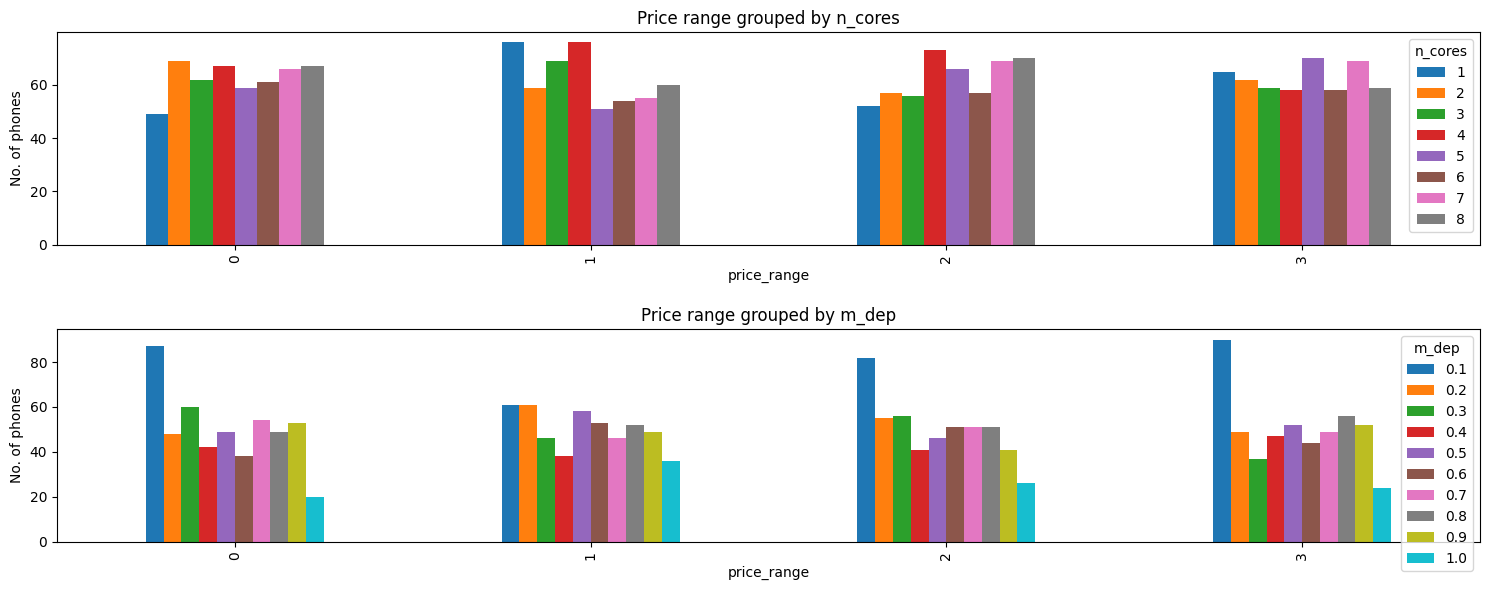

In [23]:
#price range w.r.t n_cores and m_dep
list_2 = ['n_cores', 'm_dep']
fig, axes = plt.subplots(len(list_2), 1, figsize=(15, 6 * len(list_2)))

for i, item in enumerate(list_2):
 ax = axes[i]
 grouped_data = dataset.groupby(['price_range'])[item].value_counts().unstack()
 grouped_data.plot.bar(ax=ax, figsize=(15,6))
 ax.set_title(f'Price range grouped by {item}')
 ax.set_ylabel('No. of phones')

plt.tight_layout()
plt.show()

**Observations**:

1. The number of mobiles with lower price ranges (0 and 1) tends to have fewer cores compared to higher price ranges (2 and 3).

2. Mobiles in higher price ranges (2 and 3) are more likely to have a higher number of cores.

3. The majority of phones have a thinner depth, while the count of phones with thicker depth is relatively low.

####**4. Let's analyze which numerical feature has the most significant impact on the price range.**

In [24]:
dataset.columns


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

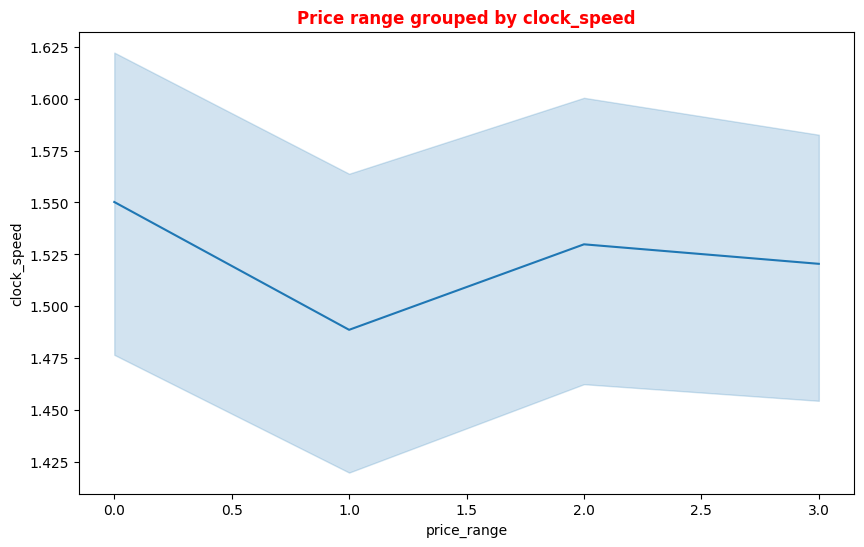

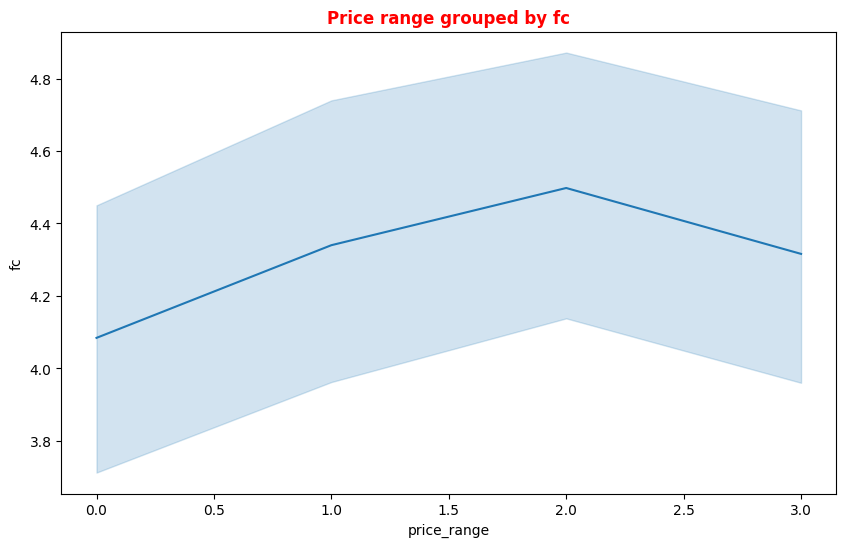

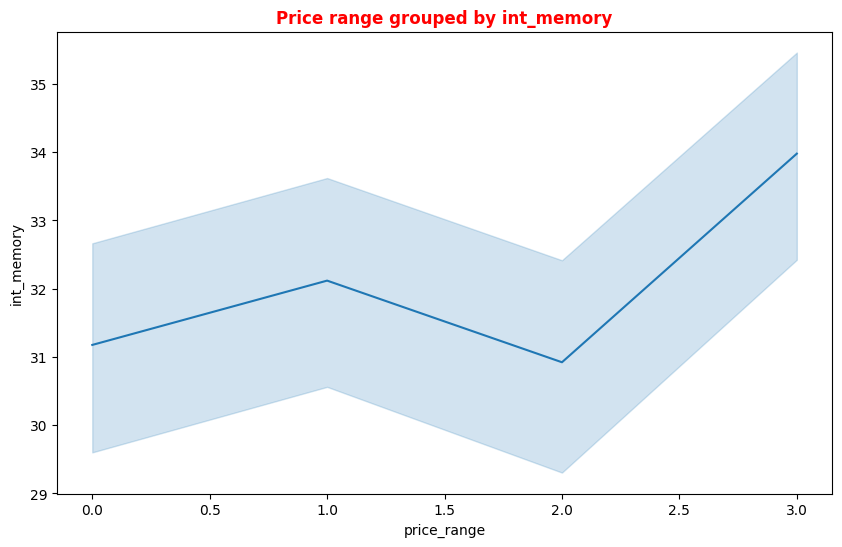

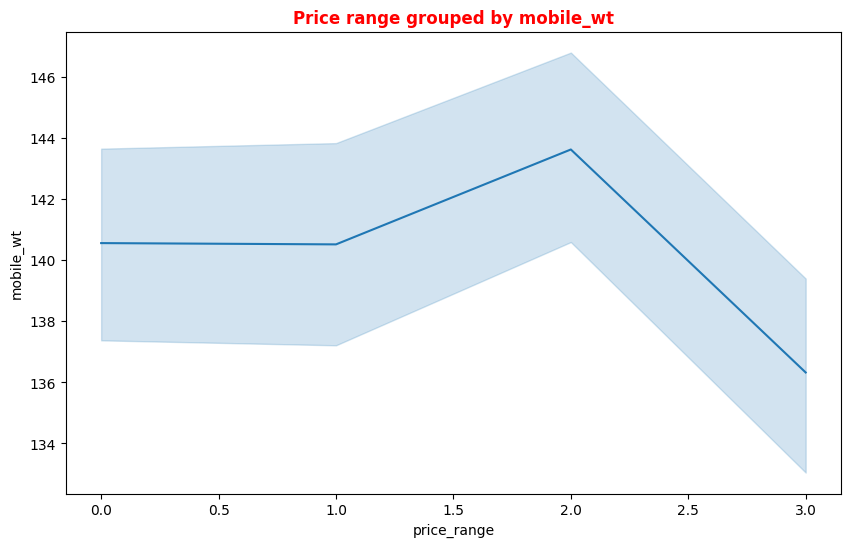

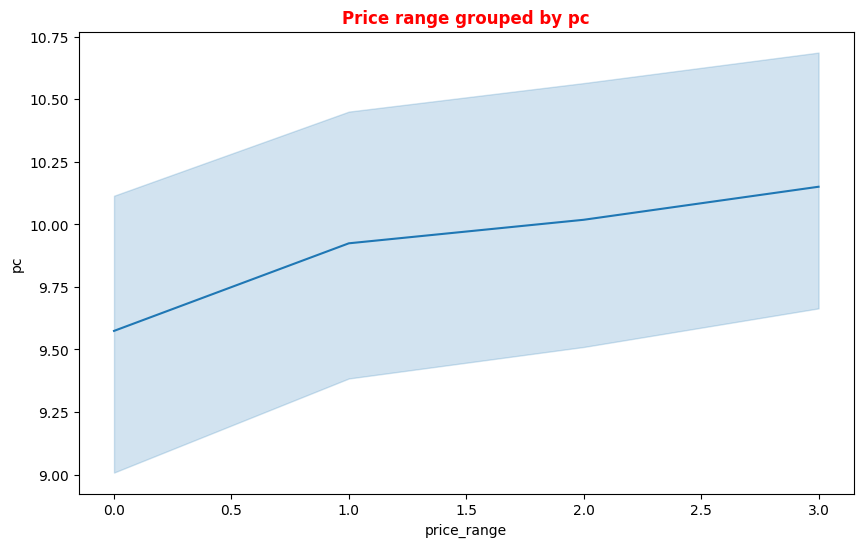

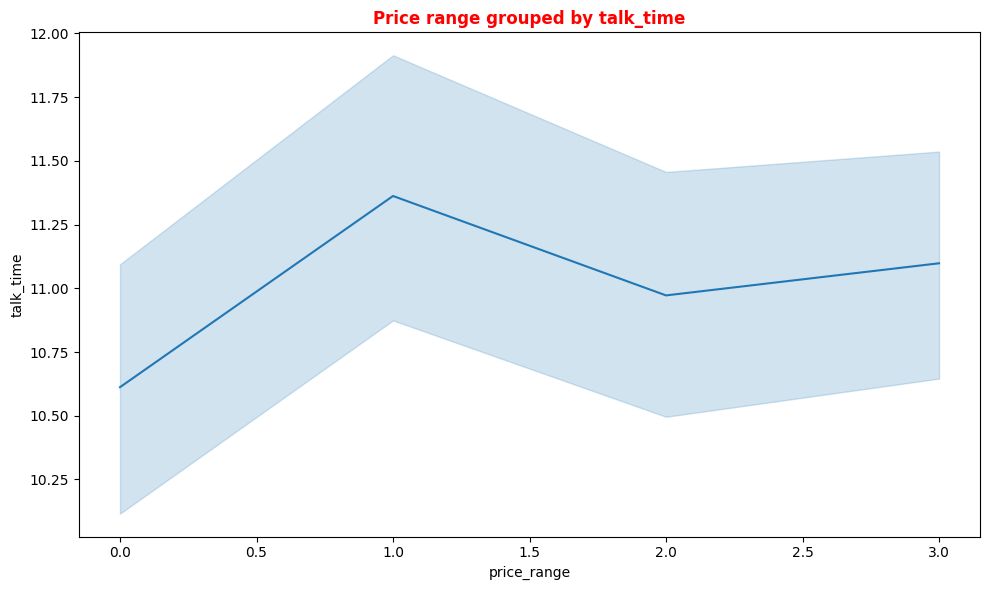

In [25]:
list_1=['clock_speed','fc','int_memory','mobile_wt','pc','talk_time']
# plotting lineplot and distribution
counter=1
for var in list_1:
    plt.figure(figsize=(10,6))

    sns.lineplot(x=dataset['price_range'],y=dataset[var])
    plt.title(f'Price range grouped by {var}',fontweight='bold',color='red')
plt.tight_layout()
plt.show()



**OBSERVATION**

1. We can observe that there is a positive correlation between clock speed of the microprocessor and the price range. As the clock speed increases, the price range tends to increase as well.

2. Similarly, there is a positive relationship between the face camera resolution and the price range. Higher face camera resolution is associated with higher price ranges.

3. When it comes to internal memory, mobile phones with larger internal memory tend to fall into price range 2 and 3, indicating that higher internal memory is a driving factor for a higher price range.

4. Furthermore, the longest time that a single battery charge will last appears to be predominantly associated with price range 1, suggesting that devices in this price range have the longest battery life.

5. There is an inverse relationship between the weight of mobile phones and their price range. Mobiles in the very high price range (Class 3) tend to have lower weight compared to other price classes. This implies that as the weight of mobiles decreases, the price tends to increase.

 In summary, clock speed, face camera resolution, internal memory, battery life
 and mobile weight are important factors influencing the price range of mobile phones.

##**5. Let's explore the correlation between the target variable (dependent variable) and the other independent variables.**

<Axes: >

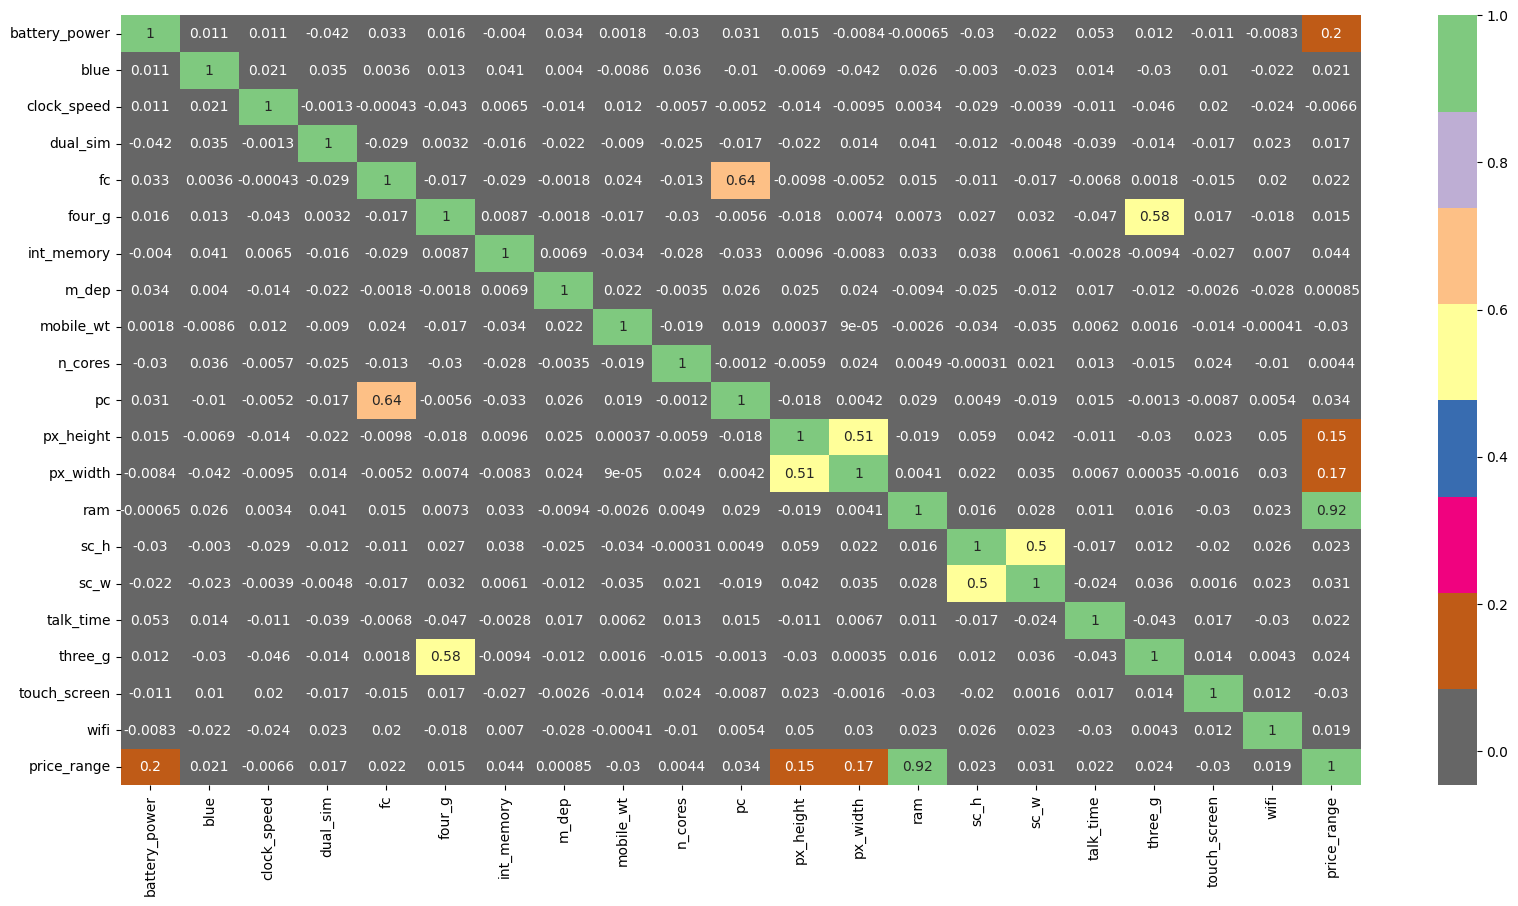

In [26]:
#checking Correlation of target varaible i.e Dependent variable with the other independent variable
corr = dataset.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Accent_r)



Based on the correlation heatmap, we can make the following observations:

1. RAM has a strong positive correlation with the price range. This means that mobiles with higher RAM tend to have higher prices.
2. Battery power also shows a positive correlation with the price range. Generally, mobiles with higher prices come with better battery power.
3. Pixel resolution height (px_height) and width (px_width) are positively correlated with the price range. This suggests that higher-priced mobiles tend to have better display resolutions.
4. There is a strong positive correlation between the availability of 4G and 3G network support. This could be because most smartphones nowadays offer both options.
5. The primary camera (pc) and front camera (fc) also show a positive correlation. This implies that mobiles with higher-priced ranges tend to have better camera specifications.
6. The screen height (sc_h) and screen width (sc_w) are positively correlated. This indicates that mobiles with larger screen sizes in terms of height also tend to have larger screen widths.

 In summary, these observations highlight the relationship between various features and the price range of mobiles, providing insights into the factors that drive pricing decisions.

##**6. examine the distribution of numerical columns and identify any outliers present in the data.**

In [27]:
dataset.columns


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [28]:
# numeric col list
numeric_col=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height',
             'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',]



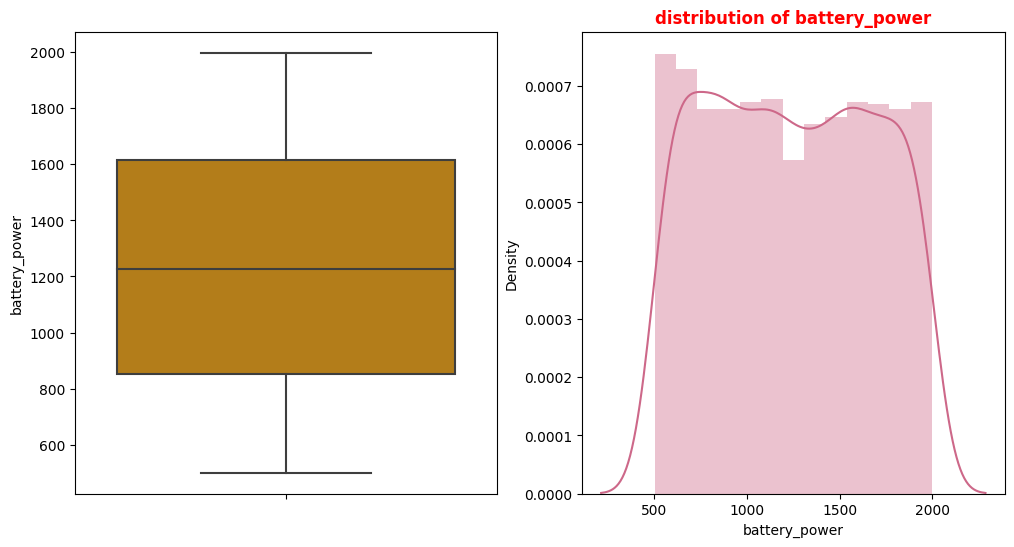

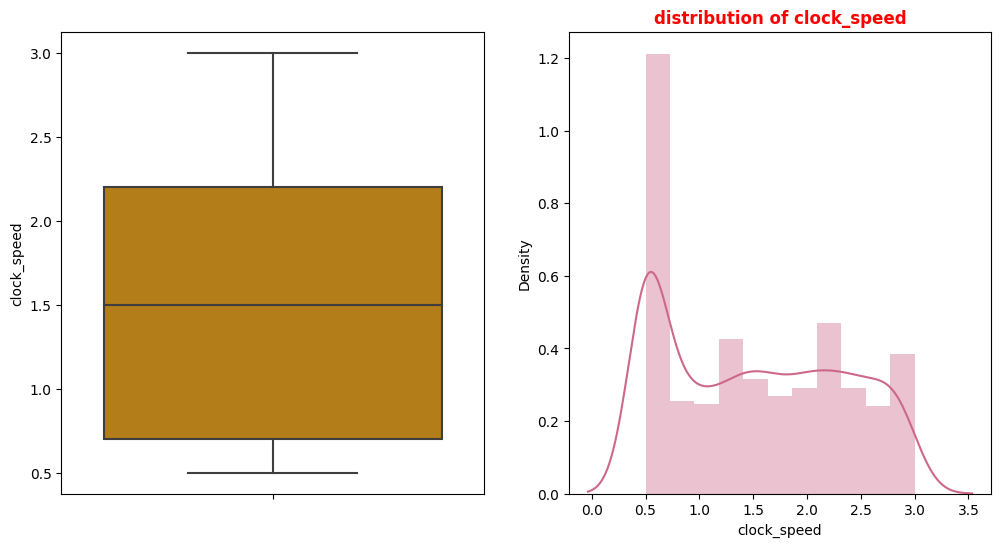

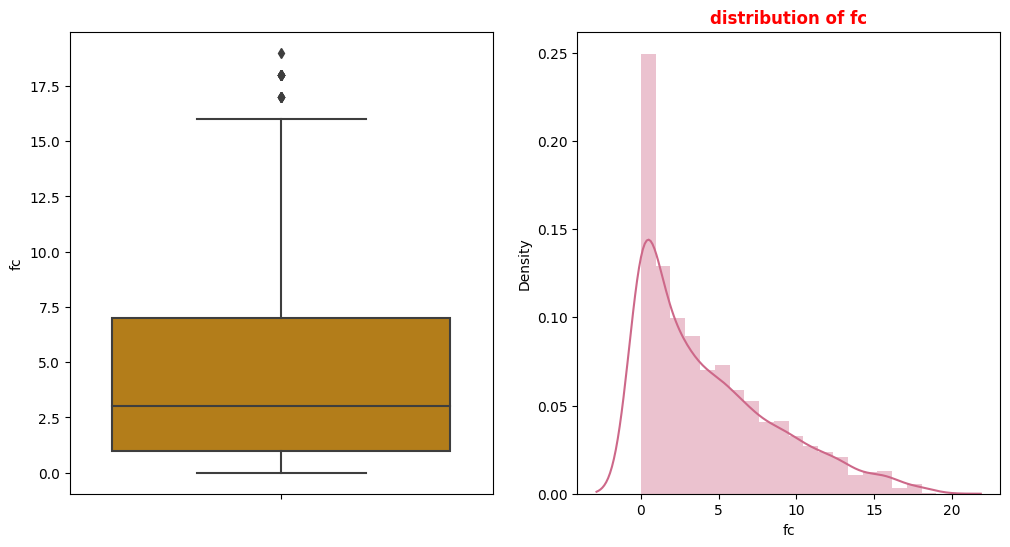

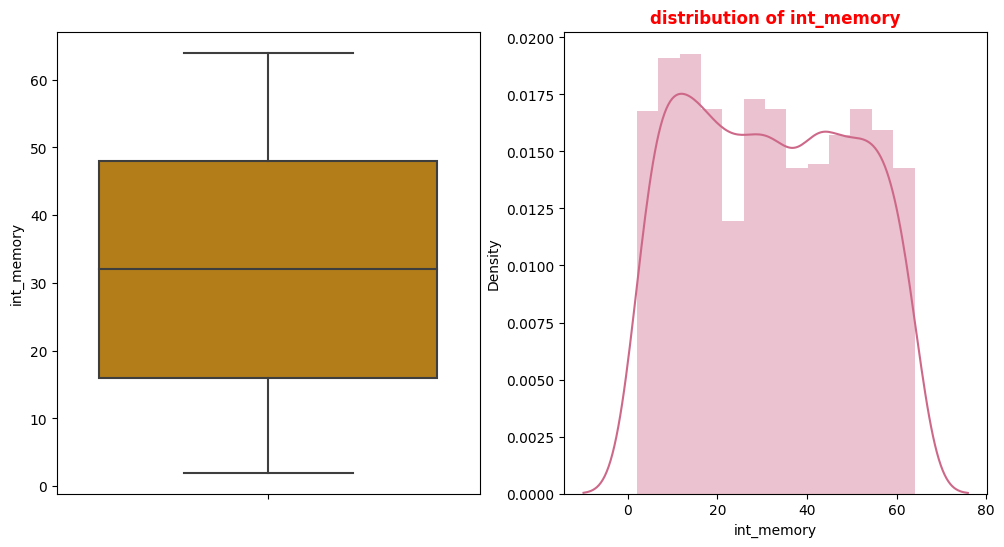

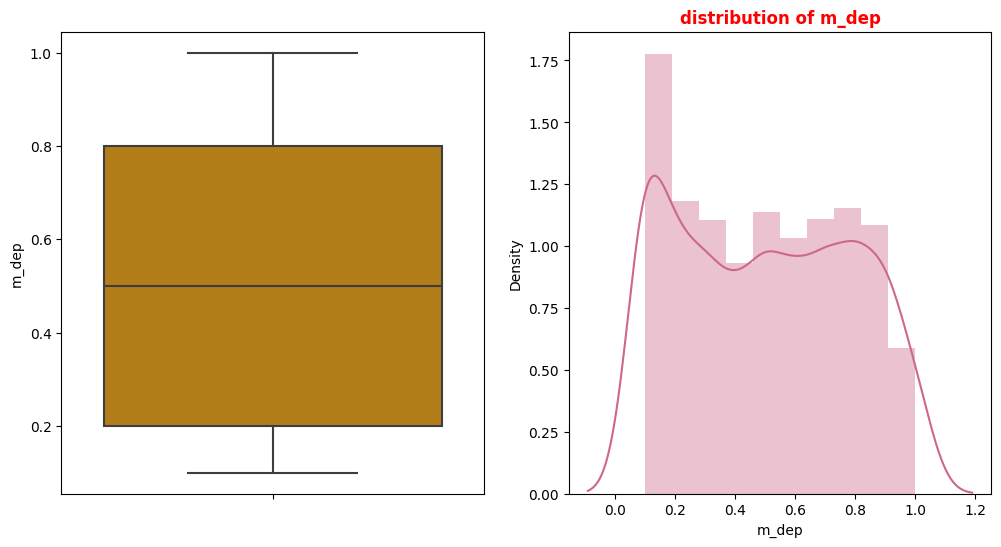

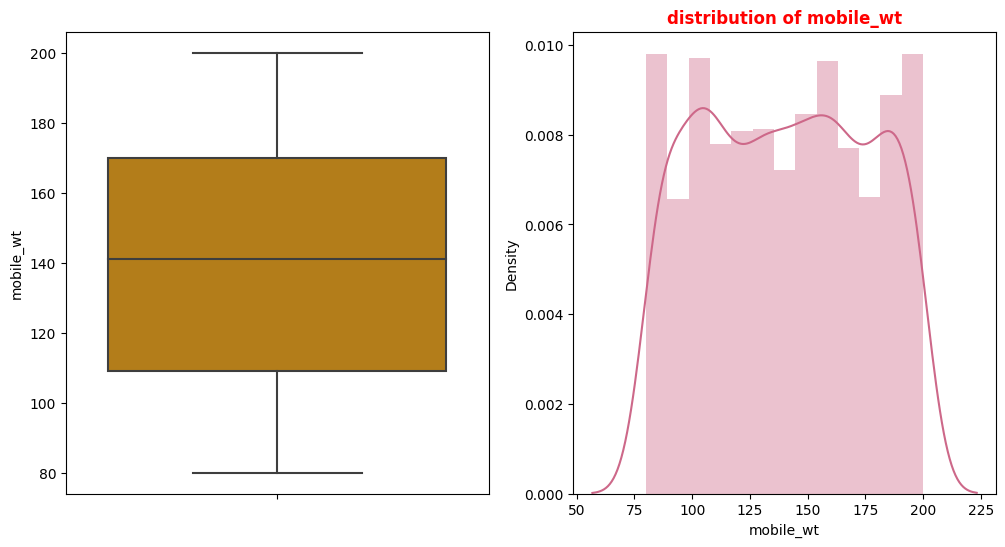

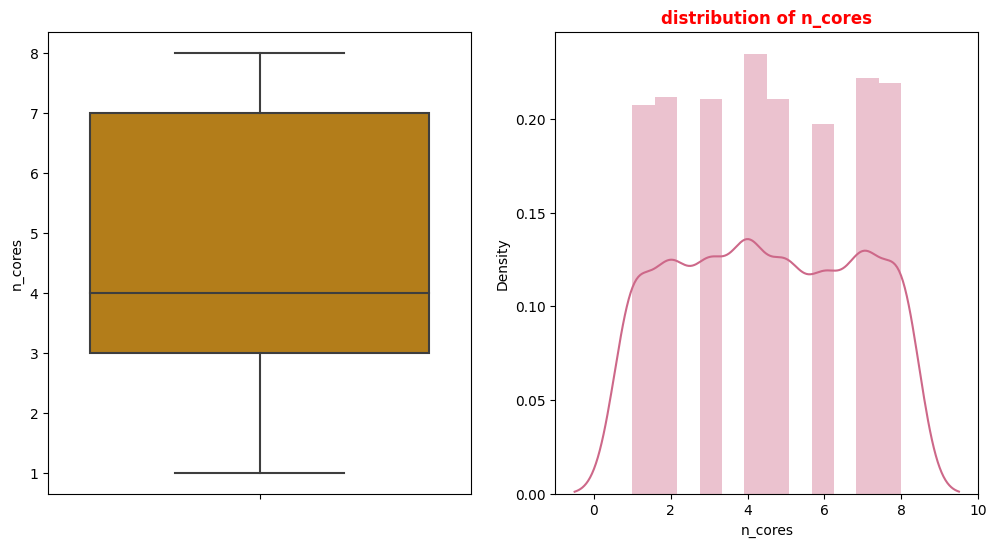

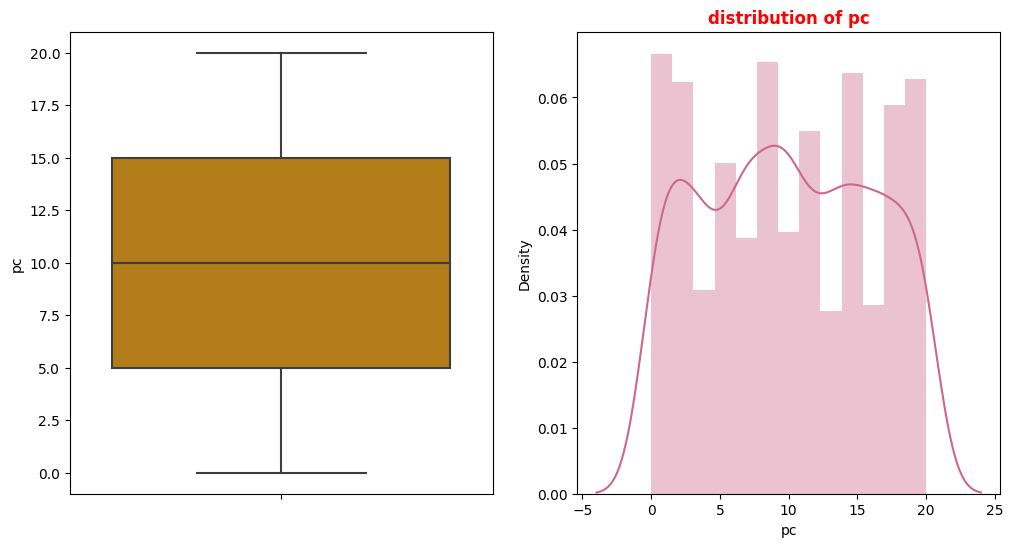

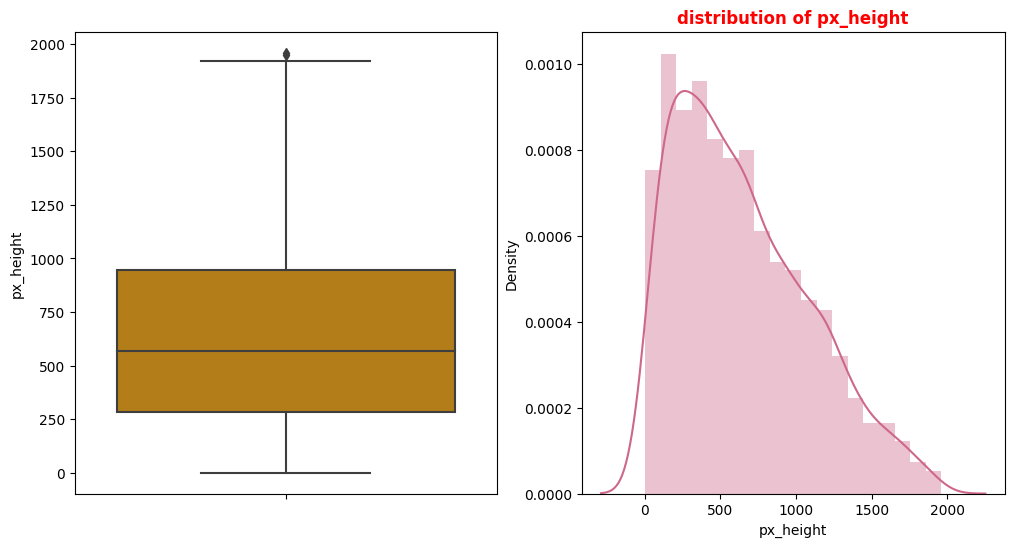

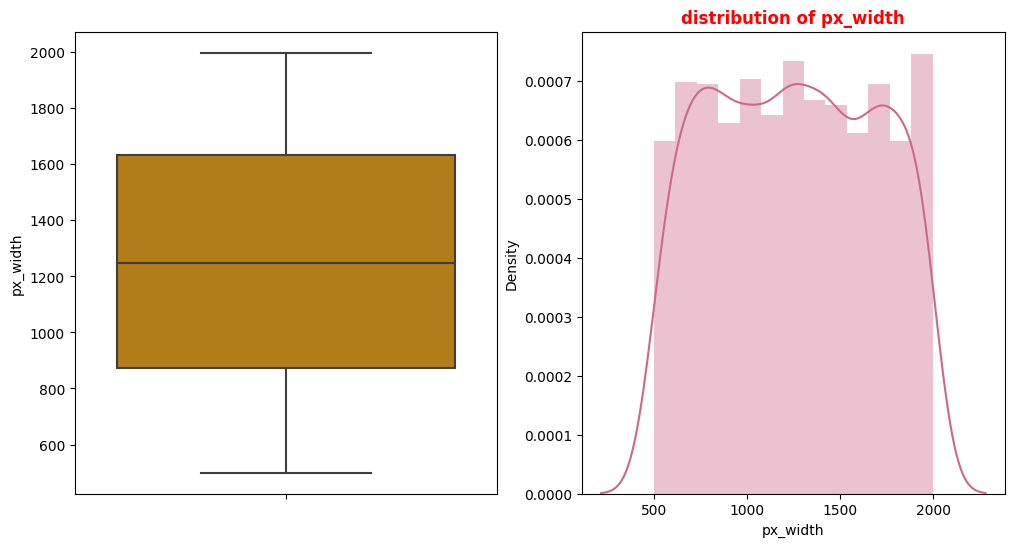

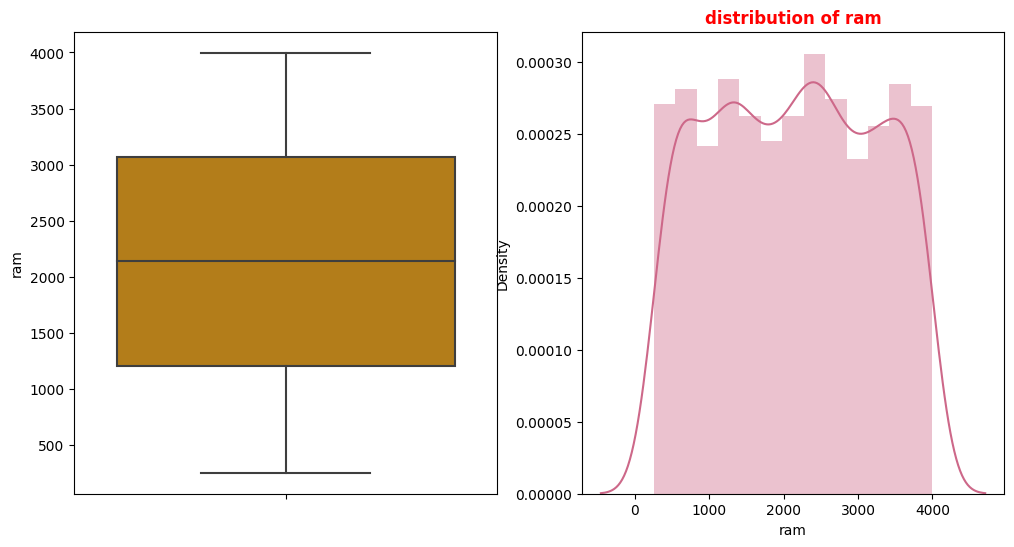

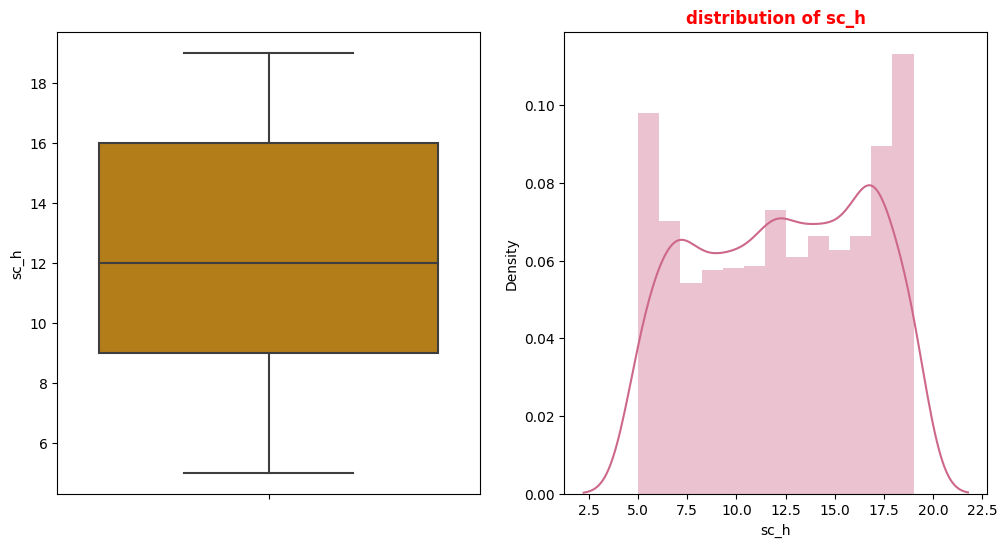

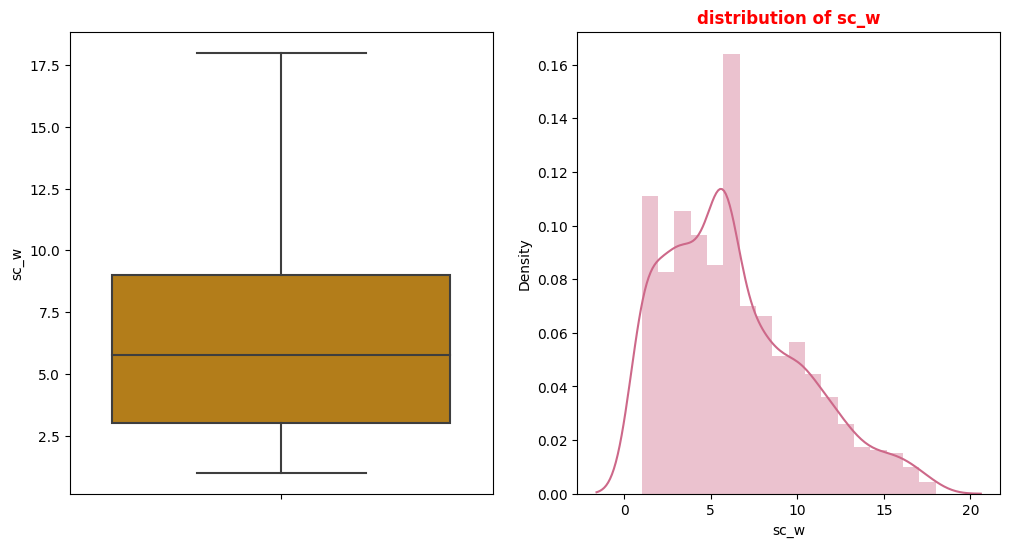

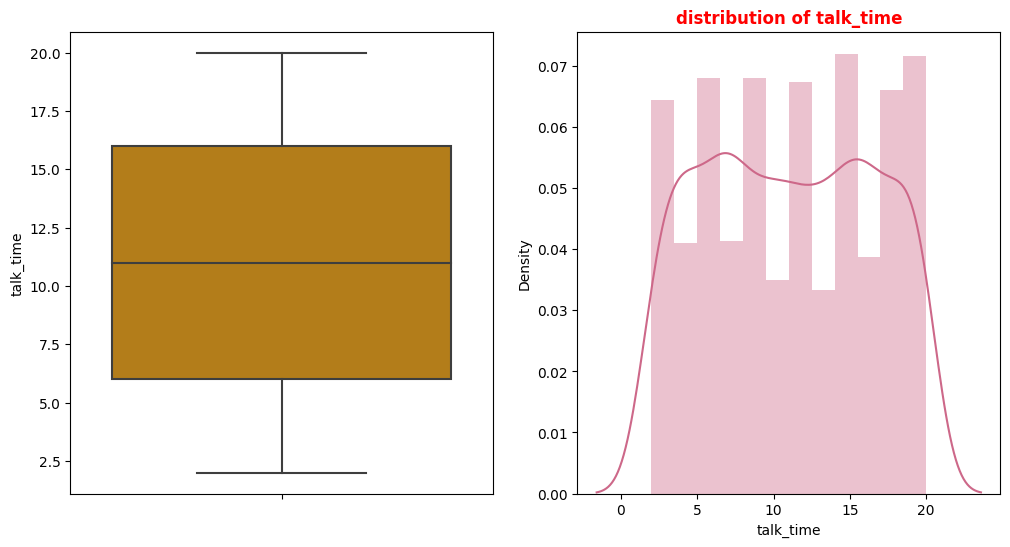

In [29]:
# plotting boXplot and distribution
# Boxplot
for var in numeric_col:
 fig, axes = plt.subplots(1, 2, figsize=(12, 6))
 sns.boxplot(y=dataset[var], color='#CD8500', ax=axes[0])
 axes[0].set_ylabel(var)

# Distribution plot
 sns.distplot(dataset[var], color='#CD6889', ax=axes[1])
 axes[1].set_xlabel(var)
 plt.title(f'distribution of {var}',fontweight='bold',color='red')
plt.show()

The data appears to be generally well-distributed for most of the numerical variables. However, there are some outliers present in the variables "fc" (front camera resolution) and "px_height" (pixel resolution height). These outliers represent values that are significantly different from the majority of the data points and may have a significant impact on the analysis or modeling process. It is important to take these outliers into consideration and determine whether they should be treated or handled in any way to ensure accurate and reliable results.

##**6.Handling Outliers**


In [30]:
#Creating a list of columns that contains outliers
outlier_cols = ['fc','px_height']
outlier_cols

['fc', 'px_height']

In [31]:
#Finding the inter-quartile range for the columns with outliers
Q1 = np.percentile(dataset[outlier_cols], 25, axis=0)
Q3 = np.percentile(dataset[outlier_cols], 75, axis=0)
IQR = Q3 - Q1
IQR

array([  6.  , 663.25])

This code calculates the Interquartile Range (IQR) for the specified columns of a dataset. The IQR is a measure of statistical dispersion that measures the range between the first quartile (Q1) and the third quartile (Q3) of a dataset.

The code uses the numpy.percentile function to calculate the values of Q1 and Q3, where the second argument (25 and 75, respectively) specifies the percentile to be calculated. In other words, Q1 is the 25th percentile of the data and Q3 is the 75th percentile of the data.

The "dataset[outlier_cols]" selects the columns that are to be considered for outlier detection. This can be useful if there are specific columns that are suspected to contain outliers, rather than examining the entire dataset.

The resulting IQR value is then calculated by subtracting Q1 from Q3, and the final result is returned as the output of the code.

Overall, this code snippet provides a simple and efficient way to calculate the IQR for a specific subset of columns within a dataset, which can be useful in identifying potential outliers within those columns.

In [32]:
#Calculating the upper and lower fence for outlier removal
u_fence = Q3 + (1.5*IQR)
l_fence = Q1 - (1.5*IQR)

In [33]:
#Detecting and removing the outliers
dataset[outlier_cols] = dataset[outlier_cols][~((dataset[outlier_cols] < l_fence) | (dataset[outlier_cols] > u_fence))]

This code calculates the upper and lower fences for identifying potential outliers in the columns specified in outlier_cols of the dataset DataFrame.

The upper fence (u_fence) is calculated by adding 1.5 times the IQR to the 75th percentile (Q3). Any data point above this value is considered a potential outlier.

The lower fence (l_fence) is calculated by subtracting 1.5 times the IQR from the 25th percentile (Q1). Any data point below this value is considered a potential outlier.

The fences serve as cutoff points for determining which data points in the specified columns are potential outliers. Any data point outside of these fences is considered an outlier and can be examined further to determine if it is an error or a legitimate extreme value.

This applies the boolean mask to the selected columns to remove the outlier values. The resulting dataframe contains only the non-outlier values for the selected columns

In [34]:
##Checking the number of outliers deleted
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1982 non-null   float64
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      1998 non-null   float64
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

After removing outliers, null values have emerged in two columns. To handle this, we can either eliminate the observations containing null values or replace them with meaningful values. In this situation, I will replace the null values with the median value of each respective column.

In [35]:
#Creating a function to impute the null values created by outlier handling.
def fill_null(outlier_cols):
  for col in outlier_cols:
    dataset[col].fillna(dataset[col].median(),inplace=True)

his function is useful for handling missing data in a dataset, especially when the data has a skewed distribution and the median is a better representation of the central tendency than the mean. By filling in missing values with the median, the function helps to preserve the statistical properties of the data and prevent bias in subsequent analyses or modeling.

In [36]:
#Calling the imputing function
fill_null(outlier_cols)

In [37]:
#Checking the number of outliers deleted
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   float64
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

The successful imputation of null values indicates that we have effectively addressed the outliers.

In [38]:
outlier_col=['fc','px_height']

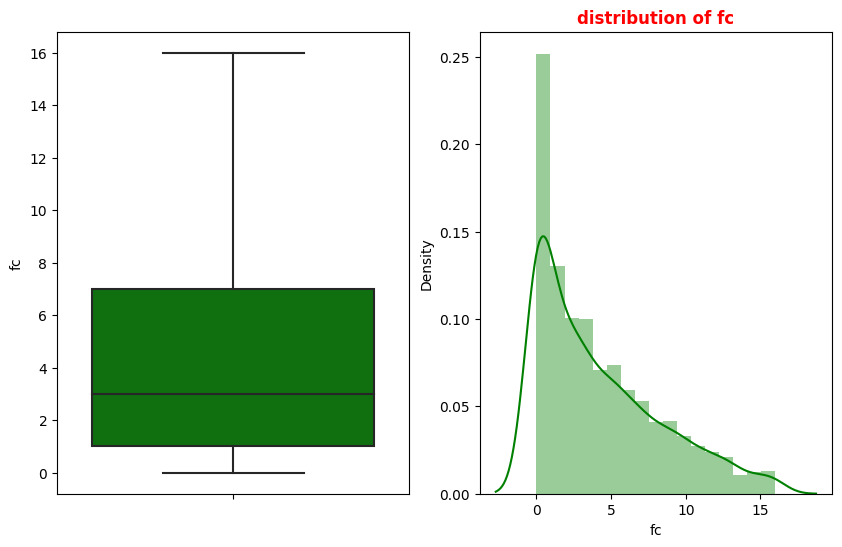

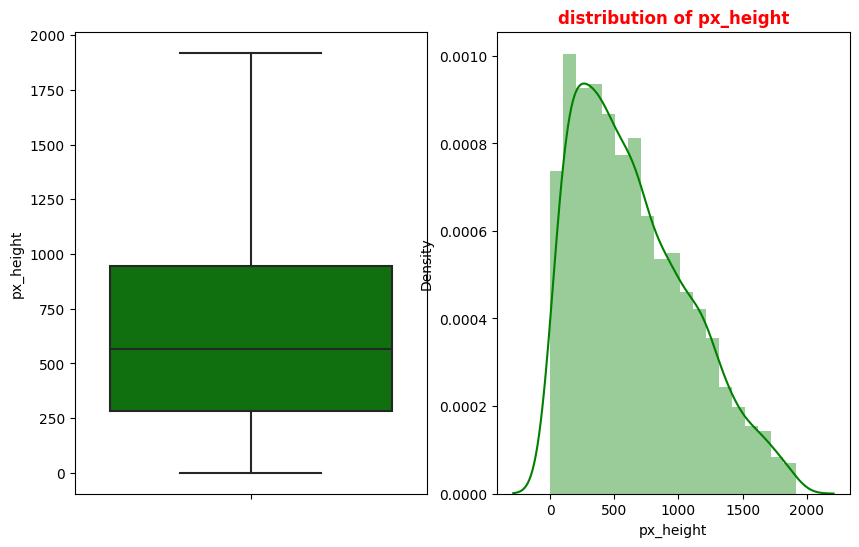

In [39]:
# Visualising whether oultliers are removed or not.
for var in outlier_col:
 fig, axes = plt.subplots(1, 2, figsize=(10,6))
 sns.boxplot(y=dataset[var], color='green', ax=axes[0])
 axes[0].set_ylabel(var)

# Distribution plot
 sns.distplot(dataset[var], color='green', ax=axes[1])
 axes[1].set_xlabel(var)
 plt.title(f'distribution of {var}',fontweight='bold',color='red')
plt.show()

Based on the box plots, we can observe that there are no outliers present in the numerical variables.

##**7.Checking Multicollinearity**

In [40]:
#Creating a list of independent columns
independent_cols = list(set(dataset.columns)-{'price_range'})
independent_cols

['px_height',
 'blue',
 'int_memory',
 'sc_h',
 'wifi',
 'four_g',
 'n_cores',
 'dual_sim',
 'touch_screen',
 'm_dep',
 'sc_w',
 'talk_time',
 'battery_power',
 'ram',
 'mobile_wt',
 'three_g',
 'pc',
 'fc',
 'clock_speed',
 'px_width']

In [41]:
#Creating a function to calculate the variance inflation factor(VIF)
def calculate_vif(X):
    vif = pd.DataFrame(columns=['Columns', 'VIF'])
    for i in range(X.shape[1]):
        vif.loc[i, 'Columns'] = X.columns[i]
        vif.loc[i, 'VIF'] = variance_inflation_factor(X.values, i)
    return vif

This is a Python function to calculate the Variance Inflation Factor (VIF) for a set of independent variables. The function takes a pandas DataFrame as input, where each column represents an independent variable, and returns a new DataFrame with two columns: 'Columns' and 'VIF'.

In this function, a new empty DataFrame is created with two columns 'Columns' and 'VIF'. Then, a for loop is run over the range of the number of columns in the input DataFrame, X. For each column, the corresponding name is assigned to the 'Columns' column in the new DataFrame, and the VIF is calculated using the variance_inflation_factor function from the statsmodels library. The result is then assigned to the 'VIF' column in the new DataFrame.

Finally, the function returns the new DataFrame with the 'Columns' and 'VIF' columns populated with the corresponding values.

Regenerate response

In [42]:
#Calculating the VIF for independent columns
calculate_vif(dataset[independent_cols])

,Columns,VIF
0,px_height,4.274949
1,blue,1.982819
2,int_memory,3.959975
3,sc_h,11.604508
4,wifi,2.019033
5,four_g,3.193884
6,n_cores,4.646723
7,dual_sim,2.014736
8,touch_screen,1.989659
9,m_dep,3.90863


multicollinearity in classification models is typically not as critical as in regression models because the focus is on predicting class labels rather than estimating precise coefficients. The model can still perform reasonably well in terms of predictive accuracy even with multicollinear variables

##**8.Feature Selection**

Feature selection is crucial in machine learning as it greatly affects model performance. Using irrelevant or partially relevant features can have a negative impact on the model's accuracy. Therefore, feature selection and data cleaning should be prioritized as the initial and essential steps in model development.

In [43]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0,7,0.6,188,2,...,20.0,756,2549,9,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1,53,0.7,136,3,...,905.0,1988,2631,17,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1,41,0.9,145,5,...,1263.0,1716,2603,11,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0,10,0.8,131,6,...,1216.0,1786,2769,16,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1,44,0.6,141,2,...,1208.0,1212,1411,8,2.0,15,1,1,0,1


[0.06077599 0.02032601 0.03453181 0.01964417 0.03191424 0.01727902
 0.0356281  0.03257137 0.03680083 0.0331276  0.03485295 0.04735157
 0.04962101 0.38822568 0.03489175 0.03528947 0.03457267 0.01385754
 0.01867299 0.02006523]


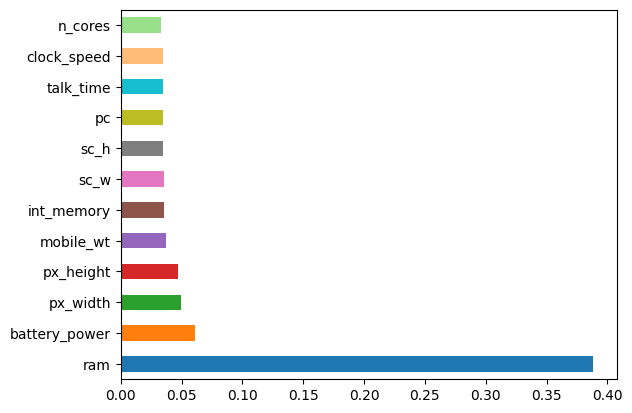

In [44]:
#checking the feature importance of independent column w.r.t target variable
X = dataset.iloc[:,0:20]  #independent columns
y = dataset.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh',color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ffbb78', '#98df8a'])
plt.show()

In [45]:
#12 features with highest feature importance statistic are selected as independent variables.
X=dataset[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_h','talk_time','sc_w','pc','m_dep','clock_speed']]

# dependent varaible
y=dataset['price_range']

##**9. Predictive Modeling:**

Predictive modeling involves utilizing statistical and machine learning techniques to analyze data and construct models that can predict future outcomes or behaviors. This process entails identifying patterns and relationships within historical data and using this information to develop accurate models for predicting future events. Some commonly used algorithms for predictive modeling include
1. Decision Trees

2. Random Forest classifier

3.  Gradient Boosting Classifier

4. K-nearest Neighbors classifier

5. XG Boost Classifier and

6. Support Vector Machine (SVM).

For tree-based models such as Decision Trees and Random Forest, feature scaling is not required. Therefore, we can use the original unscaled data (X_train and X_test) for these models.

However, for distance-based algorithms like K-nearest Neighbors and SVM, it is advisable to use scaled data. Hence, we will use the standardized data (X_train_scaled and X_test_scaled) for these algorithms as they involve distance calculations.

By applying appropriate feature scaling techniques based on the algorithm requirements, we can ensure optimal performance and accurate predictions in predictive modeling.

In [46]:
# importing all essential libraries.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [47]:
# splitting the data into Train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1500, 12)
(500, 12)
(1500,)
(500,)


In [48]:
# Scaling the data.
# creating an object of MinMax Scaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)   # fitting the X_train
X_test_scaled=scaler.transform(X_test)         # transforming X_test


In [49]:
#Overview of what a dataframe looks like after standardizing
X_train_scaled


array([[ 0.79794809, -1.15312404, -1.58954736, ...,  0.69550098,
         0.68874105, -0.54409463],
       [ 0.97495824, -0.6652416 , -1.06204271, ..., -1.28723859,
         1.72948473, -0.42202734],
       [ 1.15196839, -0.62232601,  1.31059626, ...,  0.86072928,
         1.72948473, -0.29996004],
       ...,
       [ 1.4053724 ,  1.67930461, -0.09759213, ..., -1.45246689,
        -1.04583177,  0.55451104],
       [-1.00010238, -1.07632773, -0.09532817, ..., -0.4610971 ,
         1.38257017,  1.04278023],
       [ 0.29579825, -0.25415546, -1.19335288, ...,  1.52164247,
        -1.39274633, -1.27649842]])

In [50]:
#Overview of what a dataframe looks like after standardizing
X_test_scaled


array([[ 1.22743061, -0.91595896,  0.50009554, ..., -1.12201029,
         0.68874105, -1.27649842],
       [-1.2712074 , -0.42355909, -0.31946105, ...,  0.69550098,
        -0.00508808, -1.27649842],
       [ 0.53709103, -1.13279561,  0.65857334, ..., -1.45246689,
         0.34182648,  0.31037645],
       ...,
       [ 0.00512895, -0.61780858,  1.19060593, ...,  0.53027268,
        -0.35200264, -0.17789274],
       [ 1.20227654,  0.67869385, -1.62803483, ..., -0.13064051,
        -1.39274633,  0.06624185],
       [ 0.18866052, -1.04696444,  0.40048093, ..., -1.45246689,
        -0.69891721, -1.27649842]])

In [51]:
# Defining a fucnction for plotting roc curve
def plot_Auc_roc(y_test, pred_prob):
    '''
    Plots the ROC curve for a multi-class classification problem.

    Parameters:
    - y_test: true labels for the test set (array-like)
    - pred_prob: predicted probabilities for each class (2D array-like)
    '''

    fpr = {}  # Dictionary to store the false positive rates for each class
    tpr = {}  # Dictionary to store the true positive rates for each class
    thresh = {}  # Dictionary to store the thresholds for each class

    n_class = pred_prob.shape[1]  # Number of classes

    for i in range(n_class):
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:, i], pos_label=i)

    # Plotting the ROC curves
    plt.figure(figsize=(12, 8))
    colors = ['orange', 'green', 'blue', 'red']
    class_names = ['Low cost', 'Medium cost', 'High cost', 'Very High cost']

    for i in range(n_class):
        plt.plot(fpr[i], tpr[i], linestyle='--', color=colors[i],
                 label=f'{class_names[i]} vs Rest, AUC = {round(auc(fpr[i], tpr[i]), 4)}')

    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.savefig('Multiclass ROC', dpi=300)
    plt.show()


In [52]:
# creating a class list
Class_cat = ['low cost','medium cost', 'high cost', 'very high cost']

# **1). Decision Tree Classifier**

Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data. So here we will use X_train,X_test,y_test and Y_train which are not scaled.

**Decision Tree with default hyperparameters:**

In [53]:
# Creating object of the decision tree.
dtc=DecisionTreeClassifier(random_state=0)


In [54]:
# fitting/training the train set.
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [55]:
# Predicting y values of train and test data.
y_train_pred=dtc.predict(X_train)
y_pred=dtc.predict(X_test)

In [ ]:
# Checking train set accuracy.
accuracy_score(y_train,y_train_pred)

1.0

In [56]:
# Checking test set accuracy
accuracy_score(y_test,y_pred)

0.836

In [57]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[115,   9,   0,   0],
       [  5,  88,  17,   0],
       [  0,  15,  91,  19],
       [  0,   1,  16, 124]])

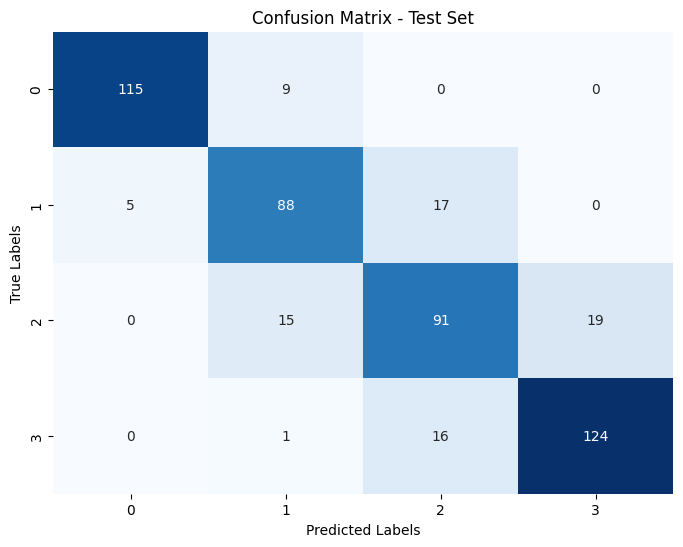

In [58]:
# Calculate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Define color map
cmap = 'Blues'

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, cmap=cmap, fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Test Set')

# Remove gridlines
plt.grid(False)

# Show the plot
plt.show()

In [59]:
# Printing classification of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       390
           2       1.00      1.00      1.00       375
           3       1.00      1.00      1.00       359

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [60]:
# printing classification of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       124
           1       0.78      0.80      0.79       110
           2       0.73      0.73      0.73       125
           3       0.87      0.88      0.87       141

    accuracy                           0.84       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.84      0.84      0.84       500



The accuracy of the model on the training set is 100%, indicating that the model fits the training data very well. However, the accuracy on the test set is 84%, suggesting that the model did not generalize well to new, unseen data. This indicates that the model is overfitted to the training set and may not perform well on new data.

To address this issue, we need to tune the hyperparameters of the model. By adjusting the hyperparameters, we can find a better balance between model complexity and generalization. This can help reduce overfitting and improve the overall performance of the model.

By tuning the hyperparameters, we aim to optimize the model's ability to generalize well to new data, improving its performance on unseen instances. This can involve techniques such as cross-validation, regularization, or adjusting parameters like the maximum depth of a decision tree or the regularization strength in logistic regression.

By finding the right combination of hyperparameters, we can achieve a more balanced and effective model that performs well both on the training set and the test set, indicating better generalization and reduced overfitting.

# **Hyperparameter Tuning for Decision Tree Classifier**

In [61]:
# creating an object of classifier.
dtc_= DecisionTreeClassifier(random_state=0)

In [62]:
# paramter grid values for hyperparameter tunning.
grid_values={'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,9,10,11,12,13,14,15],
             'splitter':['best','random'],
             'min_samples_split':[3,5,10],
             'max_features':['auto','sqrt','log2',None]}

In [63]:
# applying GridSearchCv and fitting the model with it.
dtc_tune=GridSearchCV(dtc_,param_grid=grid_values,cv=5,scoring='accuracy',verbose=3)
dtc_tune.fit(X_train,y_train)   # model fitting.

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.277 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.283 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.290 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.223 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.317 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.323 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.307 total time=   0.0s
[CV 3/5] END criterion=gini, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [64]:
# getting best parameters for model.
dtc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': None,
 'min_samples_split': 10,
 'splitter': 'best'}

In [65]:
# getting best estimators
dtc_tune.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)

In [66]:
# using best parameters and training the the data.
dtc_optimal=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)
dtc_optimal.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)

In [67]:
# predicting y values of train and test set.
y_train_pred=dtc_optimal.predict(X_train)
y_pred=dtc_optimal.predict(X_test)

In [68]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

0.9686666666666667

In [69]:
# Checking the accuarcy score of test set.
accuracy_score(y_test,y_pred)

0.862

In [70]:
# getting confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[116,   8,   0,   0],
       [ 11,  90,   9,   0],
       [  0,  15,  99,  11],
       [  0,   0,  15, 126]])

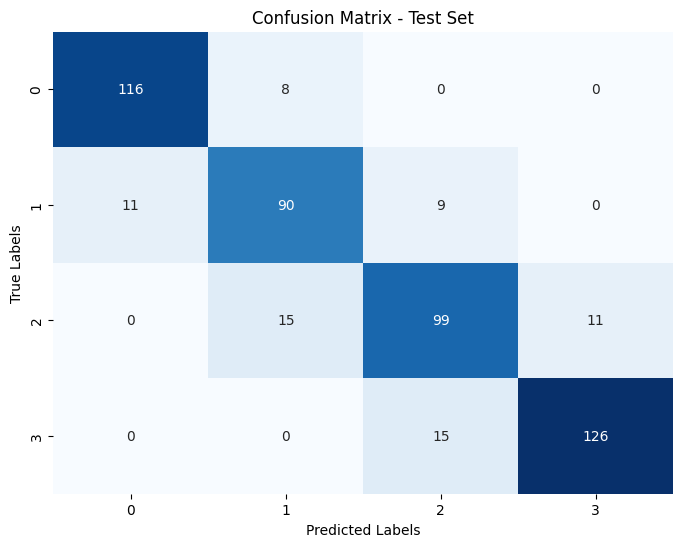

In [71]:
# Calculate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Define color map
cmap = 'Blues'

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, cmap=cmap, fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Test Set')

# Remove gridlines
plt.grid(False)

# Show the plot
plt.show()

In [72]:
# printing classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       376
           1       0.97      0.95      0.96       390
           2       0.95      0.95      0.95       375
           3       0.98      0.98      0.98       359

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500



In [73]:
# printing classification report for test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       124
           1       0.80      0.82      0.81       110
           2       0.80      0.79      0.80       125
           3       0.92      0.89      0.91       141

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



In [74]:
# creating a function for plotting the feature importances.
def plot_feature_importance(algo):
  ''' Takes the alogorithm as input and
  plots the feature importance graph'''

  # get importance
  importance = algo.feature_importances_
  feat_importance=pd.DataFrame({'Features':X.columns,'score':importance}).sort_values(by='score',ascending=False)
  plt.figure(figsize=(10,8))
  sns.barplot(x=feat_importance['score'],y=feat_importance['Features'])
  plt.title('Feature Importance')

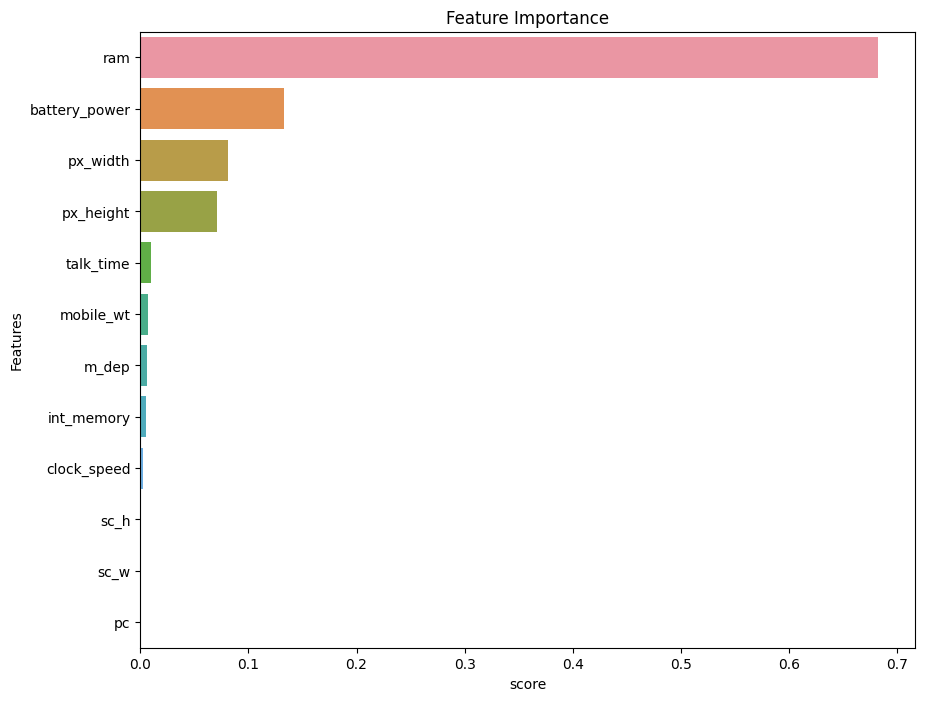

In [75]:
#plotting feature importances
plot_feature_importance(dtc_optimal)

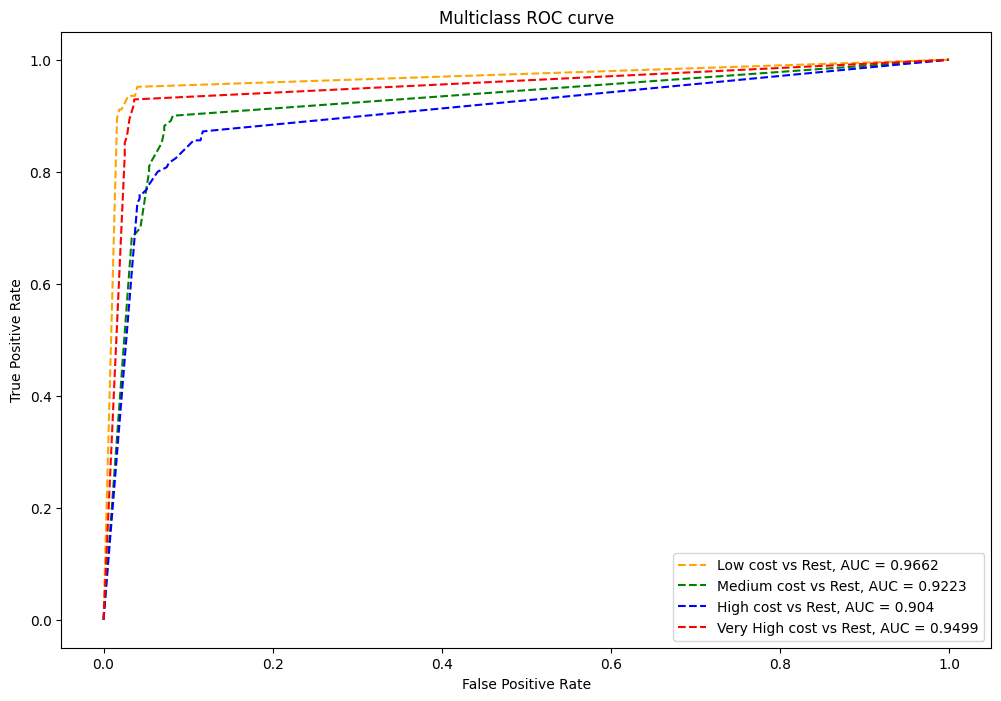

In [76]:
# Plot AUC ROC curve.
pred_prob = dtc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

**Observations from the Decision Tree Classifier:**

The training accuracy decreased from 100% to 97%, indicating that we have reduced overfitting to some extent. However, the model is still not performing well on unseen data as the test accuracy increased only by 2%. Therefore, further improvements are needed to create a better model.

Among the features, "RAM," "battery power," "px_height," and "px_width" were found to be the most important features for the classification task. These features have a significant impact on the decision-making process of the model.

The model performed well in classifying class 0 and class 3, as indicated by the high AUC values of around 0.96 and 0.94  for both classes. This suggests that the model is effective in distinguishing between these classes.

Overall, while some progress was made in reducing overfitting, the model's performance still needs improvement. Further analysis and fine-tuning of hyperparameters may be necessary to enhance the model's predictive capabilities and achieve better classification results.

# **2) Random Forest classifier:**

**With default hyperparamters:**

In [77]:
# splitting the data into trainset and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [78]:
# creating an object of the classifier.
rfc=RandomForestClassifier(random_state=0)

In [79]:
# fitting/training the model.
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [80]:
# predicting the y values of train set and test set.
y_train_pred=rfc.predict(X_train)
y_pred=rfc.predict(X_test)

In [81]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

1.0

In [82]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.894

In [83]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[122,   2,   0,   0],
       [  5,  94,  11,   0],
       [  0,  16,  99,  10],
       [  0,   0,   9, 132]])

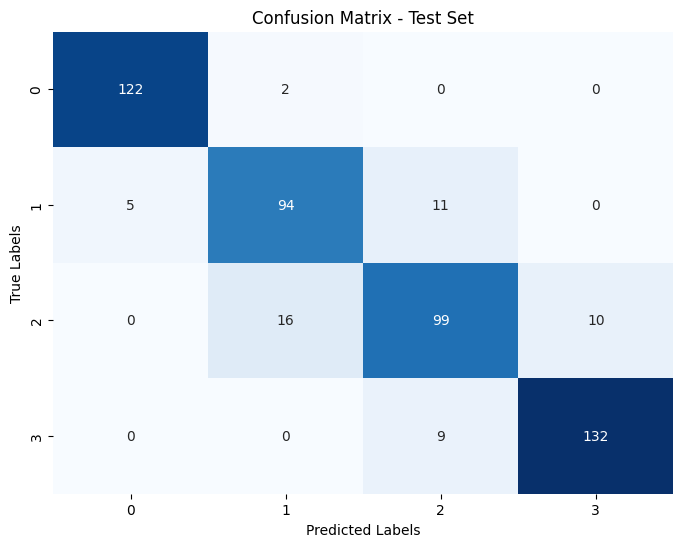

In [84]:
# Calculate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Define color map
cmap = 'Blues'

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, cmap=cmap, fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Test Set')

# Remove gridlines
plt.grid(False)

# Show the plot
plt.show()

In [85]:
# printing the classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       390
           2       1.00      1.00      1.00       375
           3       1.00      1.00      1.00       359

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [86]:
# printing the classification report for train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       124
           1       0.84      0.85      0.85       110
           2       0.83      0.79      0.81       125
           3       0.93      0.94      0.93       141

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



**Observations from the Decision Tree Classifier:**

1. The training accuracy is 100%, which indicates that the model is able to perfectly fit the training data. However, the test accuracy is 89%, suggesting that the model is not generalizing well to unseen data. This indicates overfitting, as the model is overly complex and has memorized the training data instead of learning the underlying patterns.

2. Despite the high test accuracy, we still need to address the overfitting issue to improve the model's performance on new data. Overfitting can lead to poor generalization and limited usefulness in practical applications.

3. To tackle overfitting, we can perform hyperparameter tuning. By adjusting the hyperparameters of the decision tree classifier, we can control the complexity of the model and find the optimal configuration that balances between underfitting and overfitting.

**Let's do some Hyperparamter Tunning of the Random forest model**

In [87]:
# para_grid values to pass in gridsearchcv.
grid_values={'n_estimators':[300, 400, 500, 700],
          'max_depth':[None, 10, 20, 40],
          'min_samples_split':[2,6,10],
          'max_leaf_nodes':[None],
          'criterion':['entropy','gini'],
          'max_features':['auto','log2','sqrt']

             }

In [88]:
# creating the instance
rfc_= RandomForestClassifier(random_state=0)

In [89]:
# Applying GridSearchCV
rfc_tune=GridSearchCV(rfc_,param_grid=grid_values,cv=3,verbose=3,scoring='accuracy')
rfc_tune.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.862 total time=   1.3s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.902 total time=   1.3s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.880 total time=   1.2s
[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.868 total time=   1.6s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.902 total time=   1.6s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.882 to

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 10, 20, 40],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'max_leaf_nodes': [None],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [300, 400, 500, 700]},
             scoring='accuracy', verbose=3)

In [90]:
#Getting best paramters for the models
rfc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_split': 2,
 'n_estimators': 400}

In [91]:
# fitting/training the data with best parameters.
rfc_optimal=RandomForestClassifier(max_features='auto',criterion='entropy',max_depth=10,max_leaf_nodes=None,min_samples_split=2,n_estimators=400,random_state=0)
rfc_optimal.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       n_estimators=400, random_state=0)

In [92]:
# predicting y values of train and test set.
y_train_pred=rfc_optimal.predict(X_train)
y_pred=rfc_optimal.predict(X_test)

In [93]:
# checking the train accuracy score.
accuracy_score(y_train,y_train_pred)

1.0

In [94]:
# checking the test accuracy score.
accuracy_score(y_test,y_pred)

0.898

In [95]:
# getting confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[123,   1,   0,   0],
       [  5,  93,  12,   0],
       [  0,  16, 102,   7],
       [  0,   0,  10, 131]])

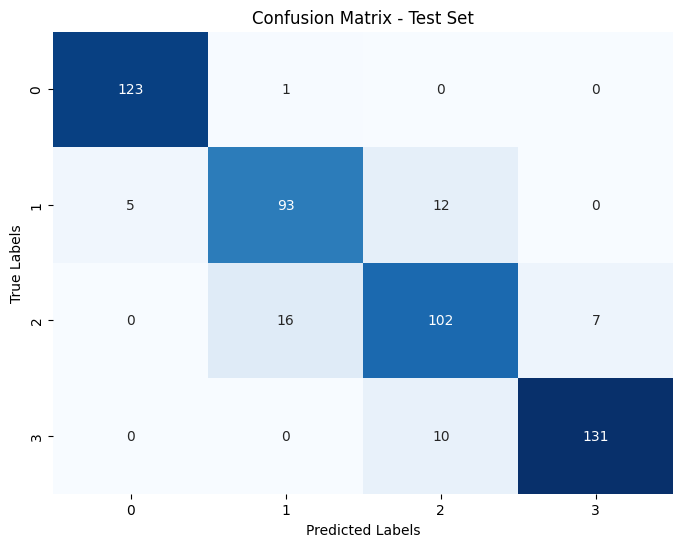

In [96]:
# Calculate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Define color map
cmap = 'Blues'

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, cmap=cmap, fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Test Set')

# Remove gridlines
plt.grid(False)

# Show the plot
plt.show()

In [97]:
# printing the classification report for train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       390
           2       1.00      1.00      1.00       375
           3       1.00      1.00      1.00       359

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [98]:
# printing the classification report for test set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       124
           1       0.85      0.85      0.85       110
           2       0.82      0.82      0.82       125
           3       0.95      0.93      0.94       141

    accuracy                           0.90       500
   macro avg       0.89      0.90      0.89       500
weighted avg       0.90      0.90      0.90       500



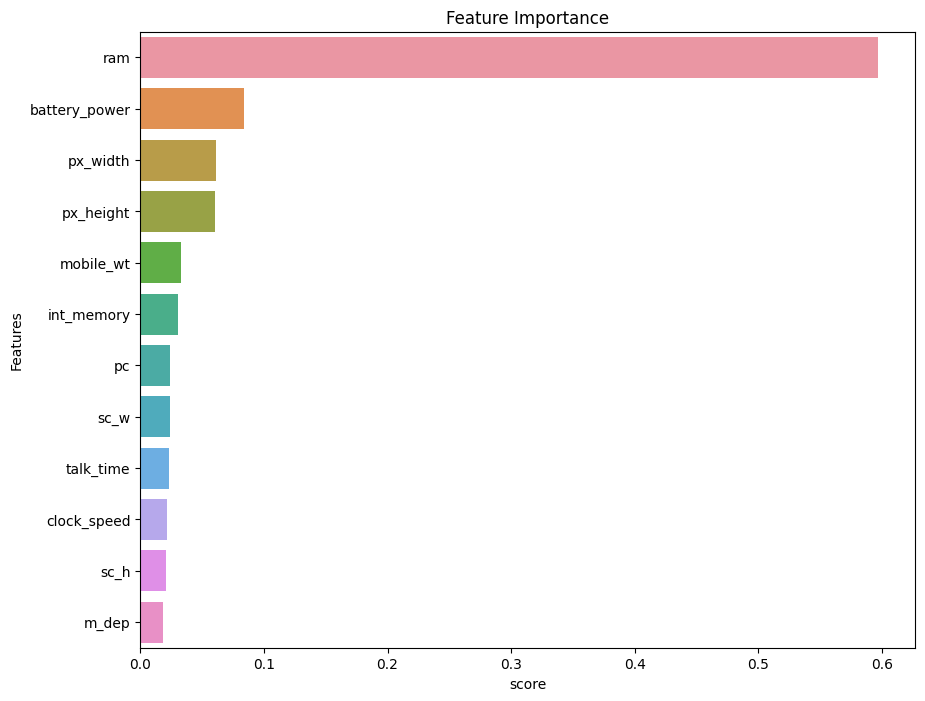

In [99]:
#plotting feature importances
plot_feature_importance(rfc_optimal)

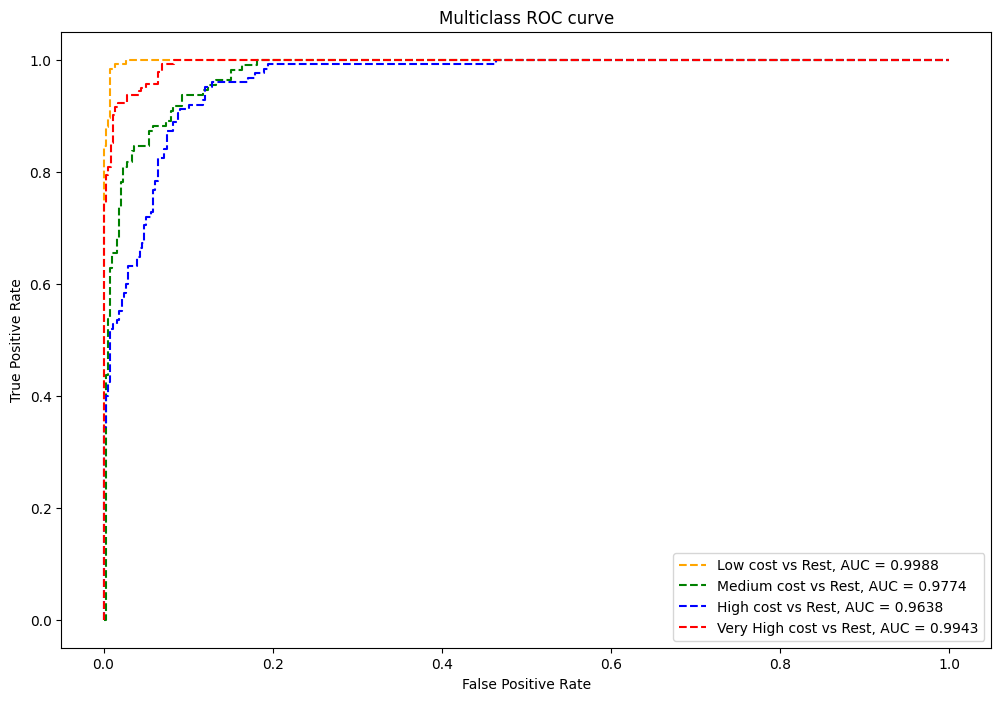

In [100]:
# Plot AUC ROC curve.
pred_prob = rfc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

Observations of Random Forest Classifier:

Before Tuning:
- The training accuracy was 100%.
- The test accuracy was 89%.
- The model exhibited overfitting and did not generalize well to unseen data.

After Tuning:
- The training accuracy remained at 100%.
- The test accuracy improved to 90%.
- The model showed a slight improvement after tuning, with a reduction in overfitting.

From the ROC curve analysis, it is evident that the model struggled to accurately classify instances belonging to class 1 and class 2. These classes had lower AUC scores, indicating poorer performance in distinguishing them from other classes.

# **3)Gradient Boosting Classifier:**

**With default hyperparameters:**

In [101]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [102]:
# creating an object of the classifier
gbc=GradientBoostingClassifier(random_state=0)

In [103]:
# fittng/training the data.
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [104]:
# predicting y values of train and test set.
y_train_pred=gbc.predict(X_train)
y_pred=gbc.predict(X_test)

In [105]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

0.9986666666666667

In [106]:
# checking the accuracy score of test data.
accuracy_score(y_test,y_pred)

0.918

In [107]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[121,   3,   0,   0],
       [  3,  99,   8,   0],
       [  0,  10, 107,   8],
       [  0,   0,   9, 132]])

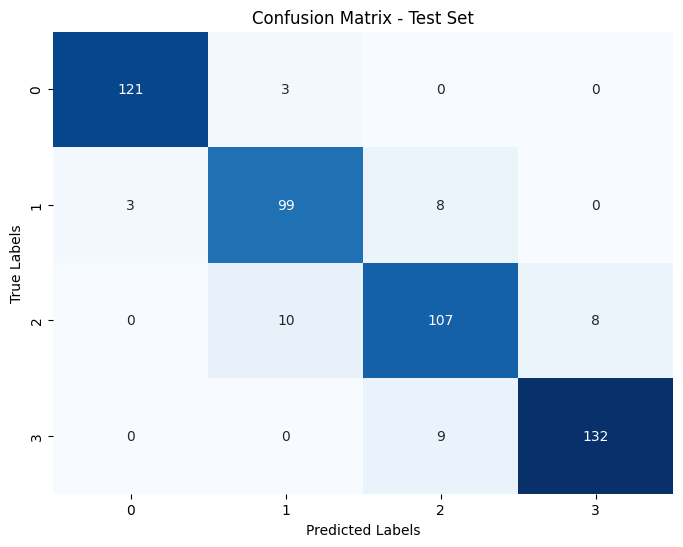

In [108]:
# Calculate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Define color map
cmap = 'Blues'

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, cmap=cmap, fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Test Set')

# Remove gridlines
plt.grid(False)

# Show the plot
plt.show()

In [109]:
# printing the classification report for train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       390
           2       1.00      1.00      1.00       375
           3       1.00      1.00      1.00       359

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [110]:
# printing the classification report for test set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       124
           1       0.88      0.90      0.89       110
           2       0.86      0.86      0.86       125
           3       0.94      0.94      0.94       141

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



**Let's do some hyperparameter tuning.**

In [111]:
# Creating an object of the classifier
gbc=GradientBoostingClassifier(random_state=0)

In [112]:
# para_grid values to pass in gridsearchcv.
grid_values={'learning_rate':[0.005,1,2,3],
             'min_samples_split':range(10,32)

             }

In [113]:
# Applying GridSearchCV
gbc_tune=GridSearchCV(gbc,param_grid=grid_values,cv=3,verbose=1,scoring='accuracy')
gbc_tune.fit(X_train,y_train)

Fitting 3 folds for each of 88 candidates, totalling 264 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.005, 1, 2, 3],
                         'min_samples_split': range(10, 32)},
             scoring='accuracy', verbose=1)

In [114]:
# Getting best parameters
gbc_tune.best_params_

{'learning_rate': 1, 'min_samples_split': 11}

In [115]:
# getting best estimators
gbc_tune.best_estimator_

GradientBoostingClassifier(learning_rate=1, min_samples_split=11,
                           random_state=0)

In [116]:
# aplying best estimarors
gbc_optimal=GradientBoostingClassifier(learning_rate=1,random_state=0,min_samples_split=11)
gbc_optimal.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1, min_samples_split=11,
                           random_state=0)

In [117]:
# predicting the y values of train and test set.
y_train_pred=gbc_optimal.predict(X_train)
y_pred=gbc_optimal.predict(X_test)

In [118]:
# train set accuracy score
accuracy_score(y_train,y_train_pred)

1.0

In [119]:
# test set accuracy score
accuracy_score(y_test,y_pred)

0.918

In [120]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[121,   3,   0,   0],
       [  4,  98,   8,   0],
       [  0,   6, 110,   9],
       [  0,   0,  11, 130]])

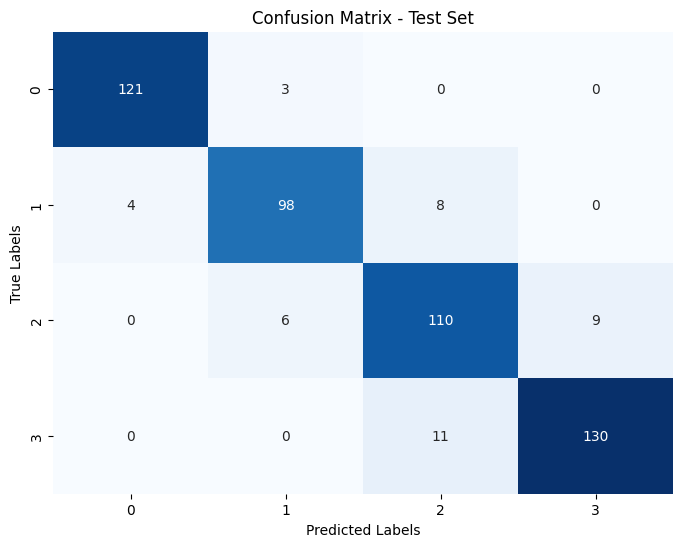

In [121]:
# Calculate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Define color map
cmap = 'Blues'

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, cmap=cmap, fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Test Set')

# Remove gridlines
plt.grid(False)

# Show the plot
plt.show()

In [122]:
# printing the classification report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       390
           2       1.00      1.00      1.00       375
           3       1.00      1.00      1.00       359

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [123]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       124
           1       0.92      0.89      0.90       110
           2       0.85      0.88      0.87       125
           3       0.94      0.92      0.93       141

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



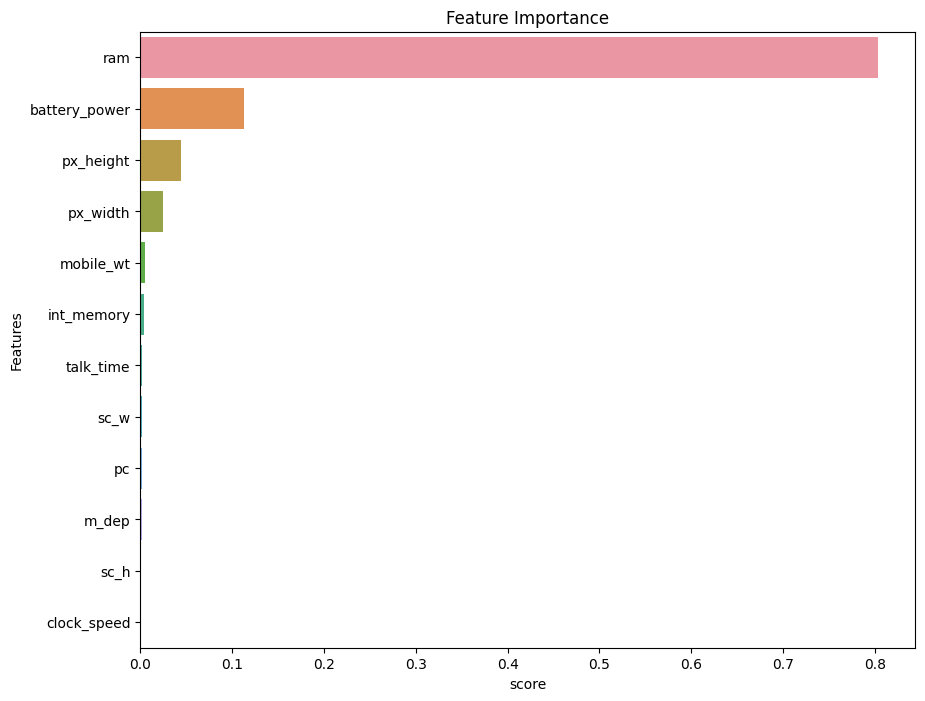

In [124]:
#plotting feature importances
plot_feature_importance(gbc_optimal)

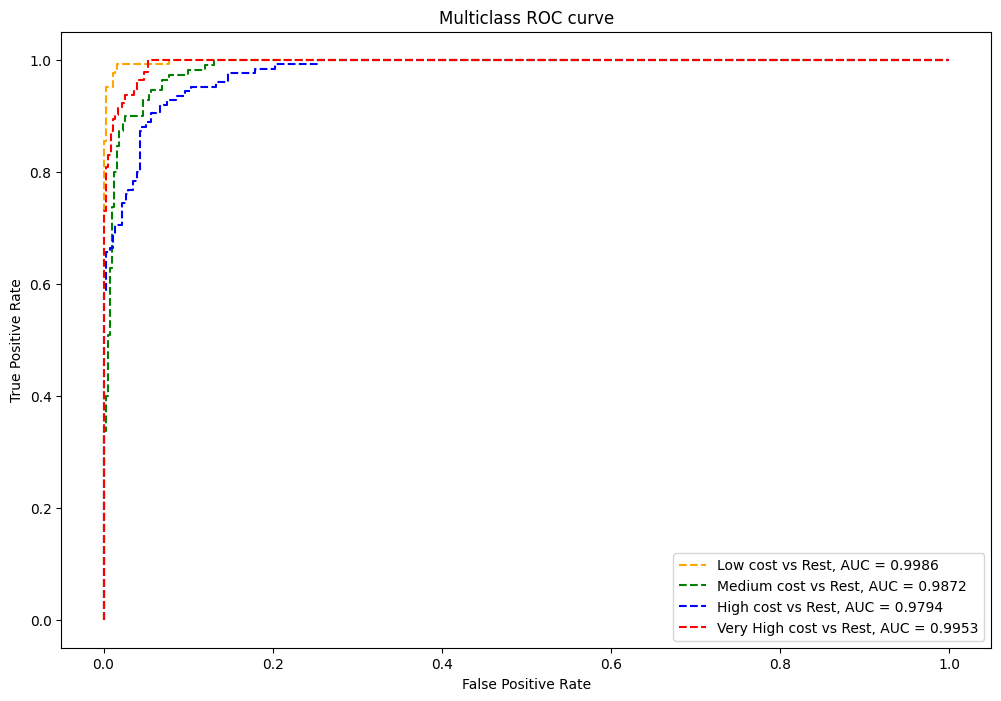

In [125]:
# Plot AUC ROC curve.
pred_prob = gbc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

**Observations of Gradient Boosting Classifier:**

Before tuning:

Training accuracy score: 100%

Test accuracy score: 92%

The model did not generalize well and showed signs of overfitting on the training data.
After hyperparameter tuning:

Training accuracy score: 100%

Test accuracy score: 92%

The model's performance not  improved after tuning, but it is not the best-performing model.
From the ROC curve, it is evident that the model performed well in classifying class 0 and class 3. Additionally, the classification report shows that the recall for class 0 is 99% and for class 3 is 99%, indicating good performance in identifying these classes accurately.

# **4)K Nearest Neighbors**

**With default hyperparametrs:**


In [126]:
knn=KNeighborsClassifier()     # creating an object of the classifier
knn.fit(X_train_scaled,y_train)   #  fitting the data

KNeighborsClassifier()

In [127]:
# predicting the y values of train and test set.
y_train_pred=knn.predict(X_train_scaled)
y_pred=knn.predict(X_test_scaled)

In [128]:
# checking the accuracy score of train set
accuracy_score(y_train,y_train_pred)

0.7813333333333333

In [129]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.612

In [130]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[95, 28,  1,  0],
       [37, 61, 12,  0],
       [ 4, 41, 64, 16],
       [ 0,  6, 49, 86]])

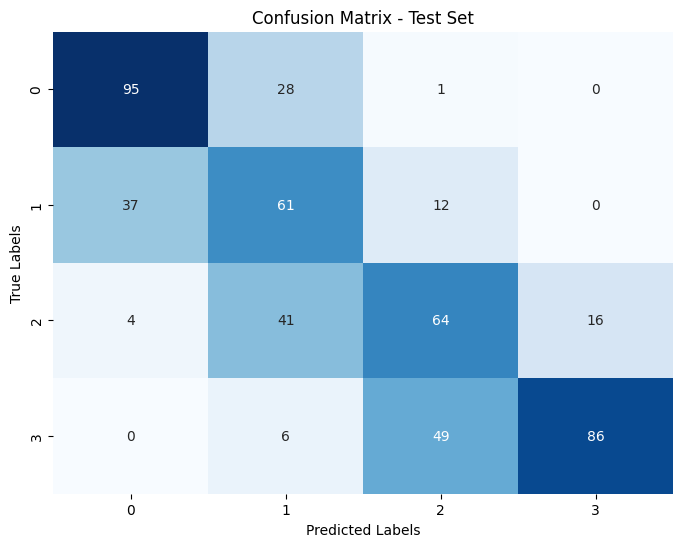

In [131]:
# Calculate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Define color map
cmap = 'Blues'

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, cmap=cmap, fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Test Set')

# Remove gridlines
plt.grid(False)

# Show the plot
plt.show()

In [132]:
# printing the classification report of test set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       376
           1       0.69      0.70      0.70       390
           2       0.74      0.71      0.73       375
           3       0.92      0.81      0.86       359

    accuracy                           0.78      1500
   macro avg       0.79      0.78      0.78      1500
weighted avg       0.79      0.78      0.78      1500



In [133]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       124
           1       0.45      0.55      0.50       110
           2       0.51      0.51      0.51       125
           3       0.84      0.61      0.71       141

    accuracy                           0.61       500
   macro avg       0.62      0.61      0.61       500
weighted avg       0.64      0.61      0.62       500



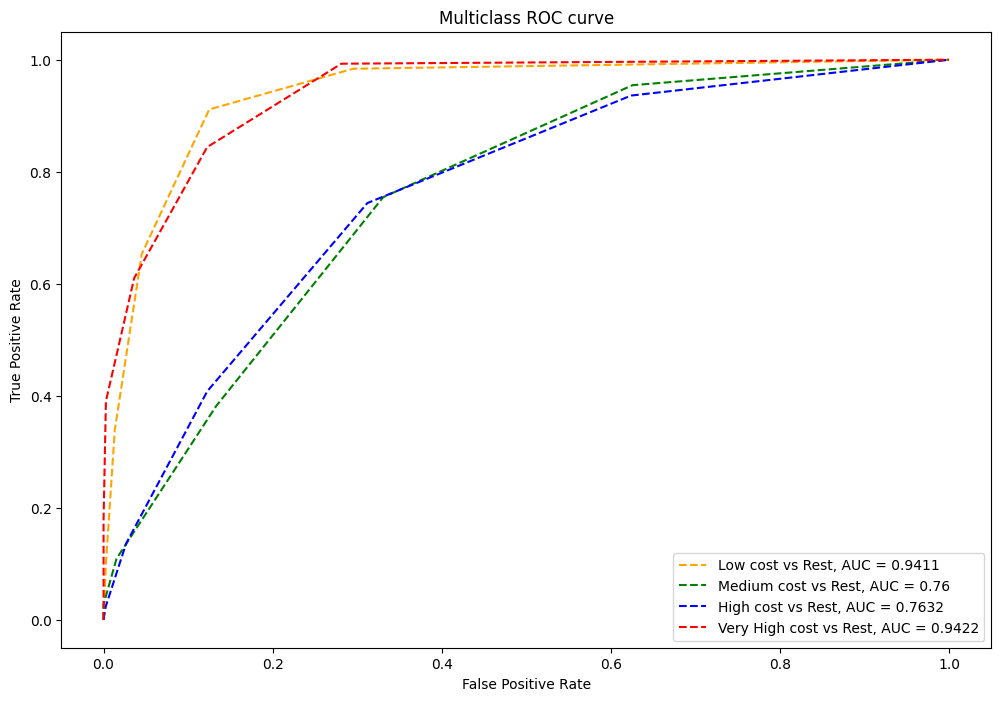

In [134]:
#Plot AUC ROC curve.
pred_prob = knn.predict_proba(X_test_scaled)
plot_Auc_roc(y_test,pred_prob)

**Let's do some HyperParameter tuning.**

In [135]:
# creating an object of classifier
knn=KNeighborsClassifier()

In [136]:
# parameter grid values.
grid_values = {'n_neighbors':list(range(1, 31))}

In [137]:
# applyong GridSearchCv with above grid values and cv=5
knn_tune=GridSearchCV(knn,cv=5,scoring='accuracy',verbose=3,param_grid=grid_values)
knn_tune.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.577 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.600 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.593 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.590 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.550 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.527 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.537 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.520 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.580 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.540 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.523 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=3)

In [138]:
# getting thge best parameters
knn_tune.best_params_                     # thus  best n_neighnors came out to be 15

{'n_neighbors': 15}

In [139]:
# fitting the data with best parameters
knn_optimal=KNeighborsClassifier(n_neighbors=15)
knn_optimal.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=15)

In [140]:
# predicting y values of train and test set.
y_train_pred=knn_optimal.predict(X_train_scaled)
y_pred=knn_optimal.predict(X_test_scaled)

In [141]:
#checking the accuracy score of train set.
accuracy_score(y_train,y_train_pred)

0.7593333333333333

In [142]:
# checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.652

In [143]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[97, 26,  1,  0],
       [25, 66, 17,  2],
       [ 0, 41, 70, 14],
       [ 0,  4, 44, 93]])

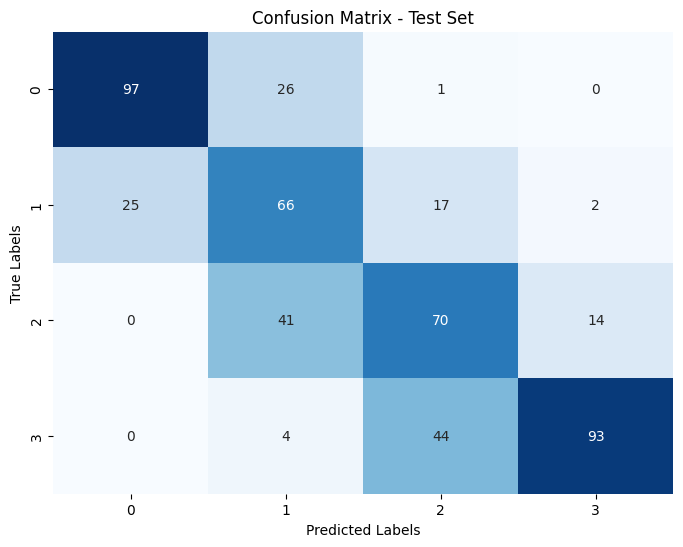

In [144]:
# Calculate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Define color map
cmap = 'Blues'

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, cmap=cmap, fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Test Set')

# Remove gridlines
plt.grid(False)

# Show the plot
plt.show()

In [145]:
# printig tye classification report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       376
           1       0.66      0.73      0.69       390
           2       0.67      0.66      0.67       375
           3       0.90      0.77      0.83       359

    accuracy                           0.76      1500
   macro avg       0.77      0.76      0.76      1500
weighted avg       0.77      0.76      0.76      1500



In [146]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       124
           1       0.48      0.60      0.53       110
           2       0.53      0.56      0.54       125
           3       0.85      0.66      0.74       141

    accuracy                           0.65       500
   macro avg       0.67      0.65      0.65       500
weighted avg       0.68      0.65      0.66       500



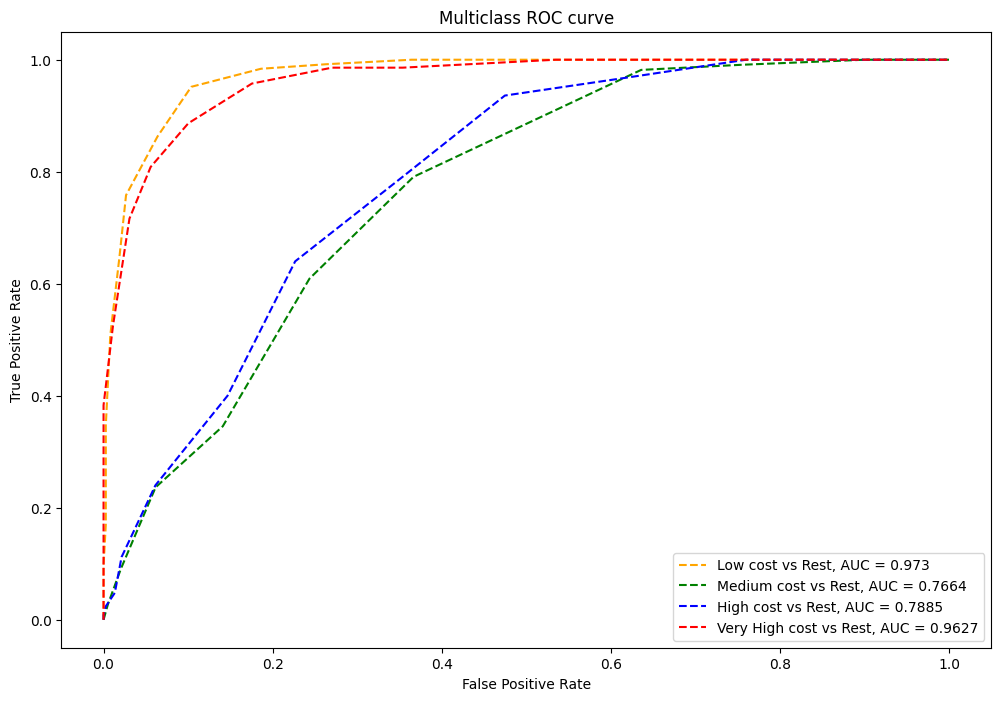

In [147]:
# Plot AUC ROC curve.
pred_prob = knn_optimal.predict_proba(X_test_scaled)
plot_Auc_roc(y_test,pred_prob)

**Observations**:

Before hyperparameter tuning:

Train accuracy: 78%

Test accuracy: 61%

The model performed poorly with low accuracies on both the training and test sets.
After hyperparameter tuning:

Train accuracy: 76%

Test accuracy: 65%

The model's performance improved slightly after hyperparameter tuning, with a reduction in overfitting. However, the overall accuracy is still not satisfactory.
In summary, the hyperparameter tuning helped improve the model's performance and reduce overfitting, but it is still not a good model for the given problem. Further improvements may be required to achieve better accuracy and generalization.

# **5) XGBoost Classifier:**

**With default hyperparameter**

In [148]:
# spltting the data into train test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [149]:
xgb=XGBClassifier()        # creating an object of the classifier
xgb.fit(X_train,y_train)      # fitting the data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [150]:
# predicting y values of train and test data.
y_train_pred=xgb.predict(X_train)
y_pred=xgb.predict(X_test)

In [151]:
# checking the accuracy score of train set
accuracy_score(y_train,y_train_pred)

1.0

In [152]:
# checking the accuracy score of test data.
accuracy_score(y_test,y_pred)

0.922

In [153]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[121,   3,   0,   0],
       [  5, 100,   5,   0],
       [  0,   8, 106,  11],
       [  0,   0,   7, 134]])

In [154]:
# printing the classification report of train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       390
           2       1.00      1.00      1.00       375
           3       1.00      1.00      1.00       359

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [155]:
# printing the classification report of the test set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       124
           1       0.90      0.91      0.90       110
           2       0.90      0.85      0.87       125
           3       0.92      0.95      0.94       141

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



**Let's Do some Hyperparameter tuning:**

In [156]:
# parameter grid values for GridSearchCv
grid_values={
          'learning_rate':[0.6,1],
          'n_estimators':[500,1000],
          'gamma':[0.2],
          'subsample':[0.5,0.6]
          }

In [157]:
# creating an object of the classifier
xgb = XGBClassifier()

# applying girdsearchcv
xgb_tune = GridSearchCV(xgb, grid_values, cv=3,verbose=4)
xgb_tune.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.854 total time=   2.4s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.910 total time=   1.7s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.916 total time=   1.7s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.866 total time=   1.9s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.896 total time=   2.0s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.912 total time=   5.1s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.854 total time=   3.2s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.908 total time=   3.2s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.2], 'learning_rate': [0.6, 1],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.6]},
             verbose=4)

In [158]:
xgb_tune.best_params_

{'gamma': 0.2, 'learning_rate': 0.6, 'n_estimators': 500, 'subsample': 0.5}

In [159]:
xgb_opti=XGBClassifier(learning_rate=.6,gamma=0.2,n_estimators=500,subsample=0.5)
xgb_opti.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [160]:
y_train_pred=xgb_opti.predict(X_train)
y_pred=xgb_opti.predict(X_test)

In [161]:
accuracy_score(y_train,y_train_pred)

1.0

In [162]:
accuracy_score(y_test,y_pred)

0.922

In [163]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[123,   1,   0,   0],
       [  7,  98,   5,   0],
       [  0,   8, 106,  11],
       [  0,   0,   7, 134]])

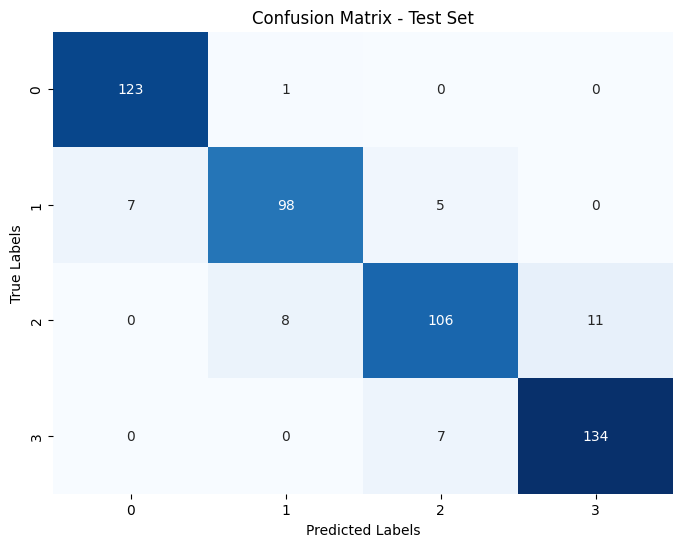

In [164]:
# Calculate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Define color map
cmap = 'Blues'

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, cmap=cmap, fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Test Set')

# Remove gridlines
plt.grid(False)

# Show the plot
plt.show()

In [165]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       390
           2       1.00      1.00      1.00       375
           3       1.00      1.00      1.00       359

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [166]:
#printing the classifiaction report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       124
           1       0.92      0.89      0.90       110
           2       0.90      0.85      0.87       125
           3       0.92      0.95      0.94       141

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



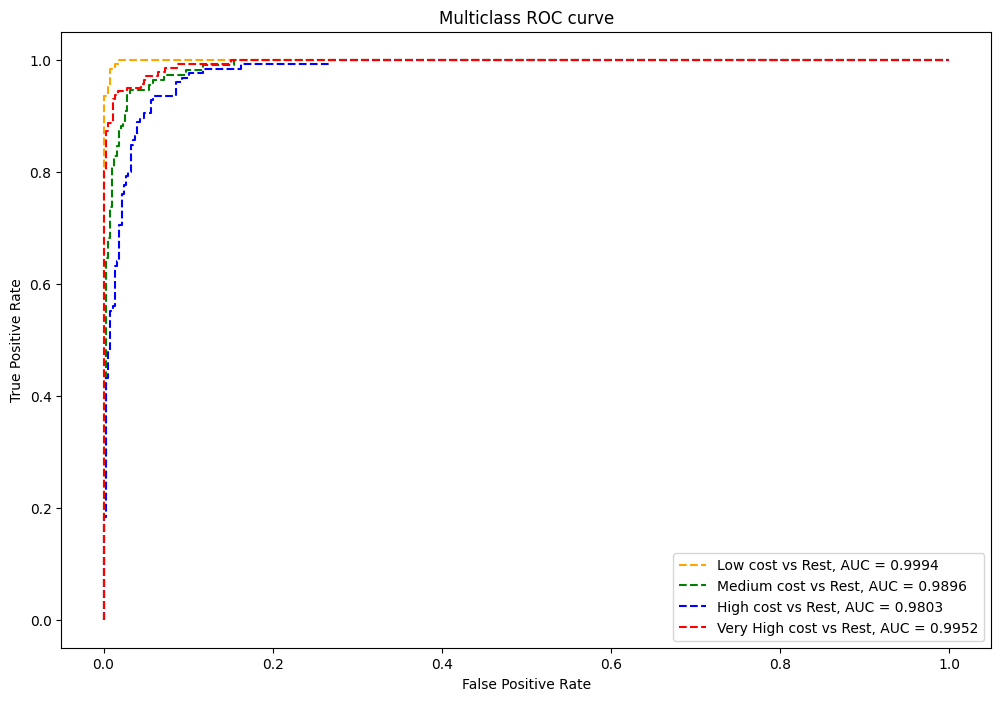

In [167]:
# Plot AUC ROC curve.
pred_prob = xgb_opti.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

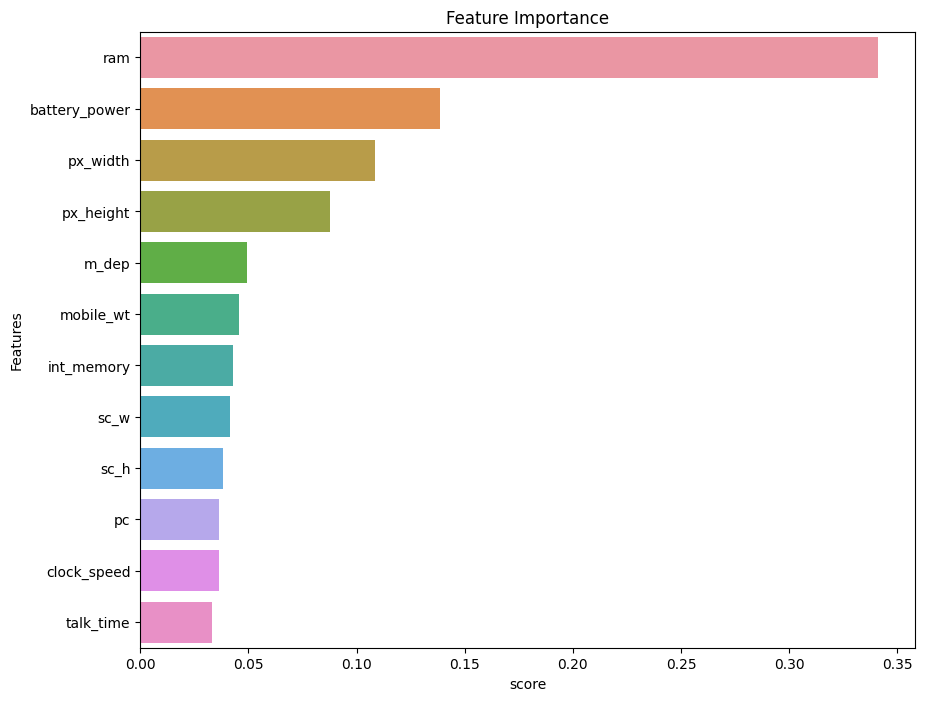

In [168]:
#plotting feature importances
plot_feature_importance(xgb_opti)

**Observations**:

Before hyperparameter tuning:

Train accuracy: 100%

Test accuracy: 92%

The model showed good performance with high accuracies on both the training and test sets.
After hyperparameter tuning:

Train accuracy: 100%

Test accuracy: 92%

The model's performance not improved after hyperparameter tuning.

From the AUC-ROC curve, it is evident that the model has performed well in correctly predicting class 0 and class 3.

Overall, the model has shown good performance, but there is room for further improvement to reduce overfitting and enhance generalization.

# **6) SVM**

**with default parameters.**

In [169]:
# Import all relevant libraries

from sklearn.svm import SVC

In [170]:
svc = SVC(random_state=101)      # creating an object of classifier
svc.fit(X_train_scaled,y_train)    # fitting the model/training the model.

SVC(random_state=101)

In [171]:
# predicting the y value of train set and test set
y_train_pred=svc.predict(X_train_scaled)
y_pred=svc.predict(X_test_scaled)

In [172]:
# Accuracy score for train set
accuracy_score(y_train,y_train_pred)

0.98

In [173]:
# Accuracy score for test set.
accuracy_score(y_test,y_pred)

0.94

In [174]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[123,   1,   0,   0],
       [  7,  99,   4,   0],
       [  0,   7, 115,   3],
       [  0,   0,   8, 133]])

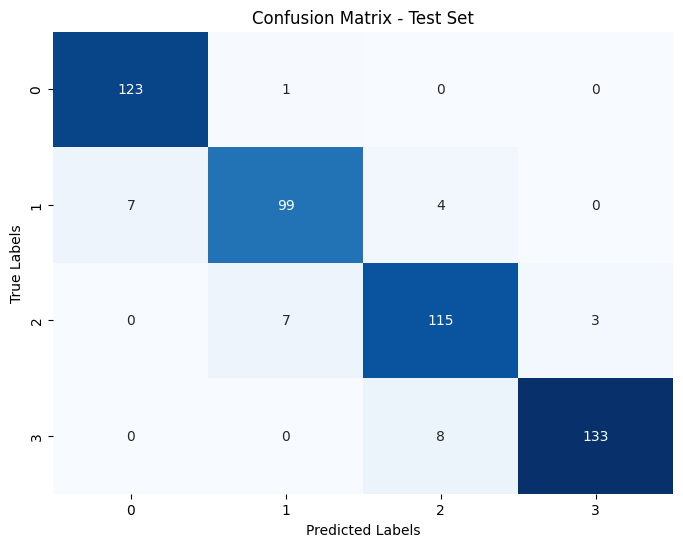

In [175]:
# Calculate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Define color map
cmap = 'Blues'

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, cmap=cmap, fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Test Set')

# Remove gridlines
plt.grid(False)

# Show the plot
plt.show()

In [176]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       376
           1       0.97      0.98      0.97       390
           2       0.97      0.97      0.97       375
           3       0.99      0.98      0.99       359

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



In [177]:
#printing the classifiaction report of train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       124
           1       0.93      0.90      0.91       110
           2       0.91      0.92      0.91       125
           3       0.98      0.94      0.96       141

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



**Hyperparameter Tuning**

In [178]:
# parameter grid for GridSearchCv
grid_values = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}



In [179]:
# creating an object for classifier
svm  = SVC ()

In [180]:
# Hyperparameter tuning with the GrdiSearhCV with cv=5
svm_cv = GridSearchCV(svm, grid_values, cv = 5,verbose=2)
svm_cv.fit(X_train_scaled,y_train)     # fitting the data into the model

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ...........C=0.01, degree=1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ...........C=0.01, degree=1, gamma=0.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [1, 3, 5, 7],
                         'gamma': [0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [181]:
# getting the best parameters
svm_cv.best_params_

{'C': 10, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}

In [182]:
# getting the best estimators
svm_cv.best_estimator_

SVC(C=10, degree=1, gamma=0.01, kernel='linear')

In [183]:
# applying best parameters to the SVm model.
svm_optimal=SVC(C=10, degree=1, gamma=0.01, kernel='linear',probability=True)
svm_optimal.fit(X_train_scaled,y_train)   # fitting the data

SVC(C=10, degree=1, gamma=0.01, kernel='linear', probability=True)

In [184]:
# predicting the y values of train and test set.
y_train_pred=svm_optimal.predict(X_train_scaled)
y_pred=svm_optimal.predict(X_test_scaled)

In [185]:
y_train_pred

array([2, 2, 3, ..., 3, 0, 1])

In [186]:
y_pred

array([3, 0, 2, 2, 2, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 1, 3, 0, 0, 3, 3, 2, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 1, 3, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 2, 1, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 2, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 1, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 3, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [187]:
# checkig the accuracy score of train set.
accuracy_score(y_train,y_train_pred)

0.9833333333333333

In [188]:
# checking the accuracy of test data
accuracy_score(y_test,y_pred)

0.966

In [189]:
# Confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[121,   3,   0,   0],
       [  3, 107,   0,   0],
       [  0,   4, 118,   3],
       [  0,   0,   4, 137]])

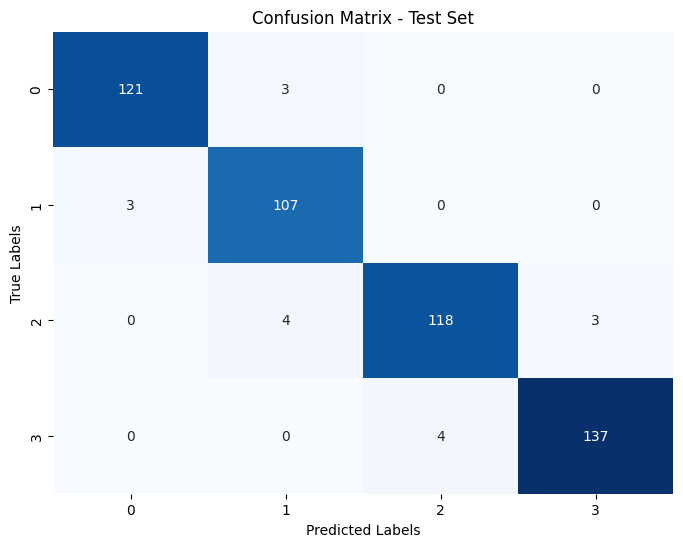

In [190]:
# Calculate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Define color map
cmap = 'Blues'

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, cmap=cmap, fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Test Set')

# Remove gridlines
plt.grid(False)

# Show the plot
plt.show()

In [191]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       376
           1       0.98      0.98      0.98       390
           2       0.98      0.97      0.97       375
           3       0.99      0.99      0.99       359

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



In [192]:
#printing the classifiaction report of train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       124
           1       0.94      0.97      0.96       110
           2       0.97      0.94      0.96       125
           3       0.98      0.97      0.98       141

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



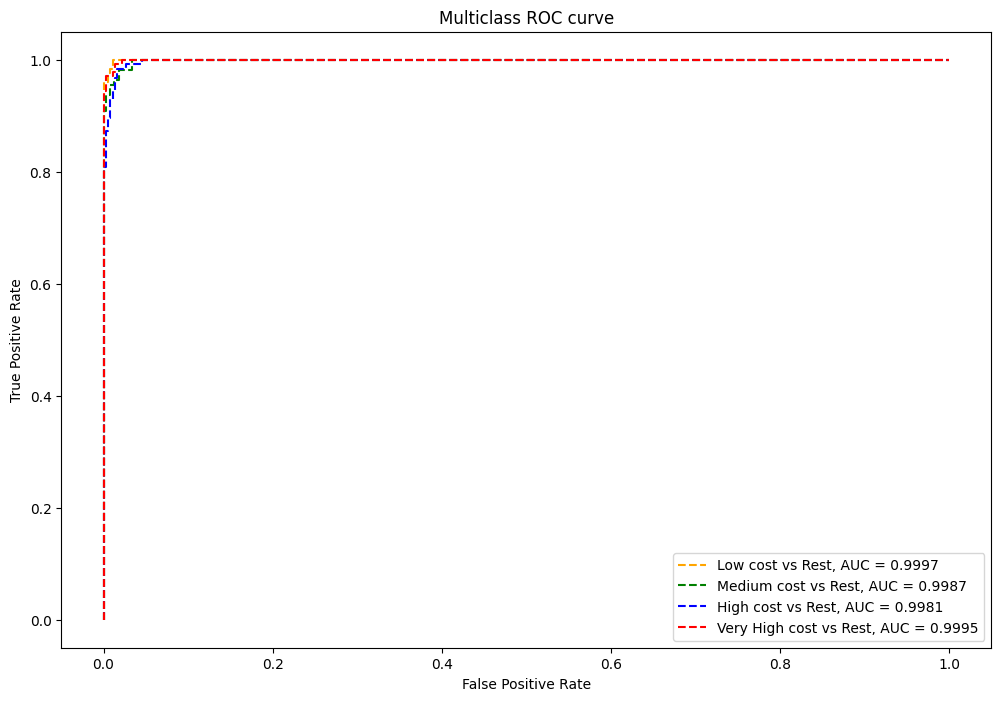

In [193]:
# Plot AUC ROC curve.
pred_prob = svm_optimal.predict_proba(X_test_scaled)
plot_Auc_roc(y_test,pred_prob)

<Axes: >

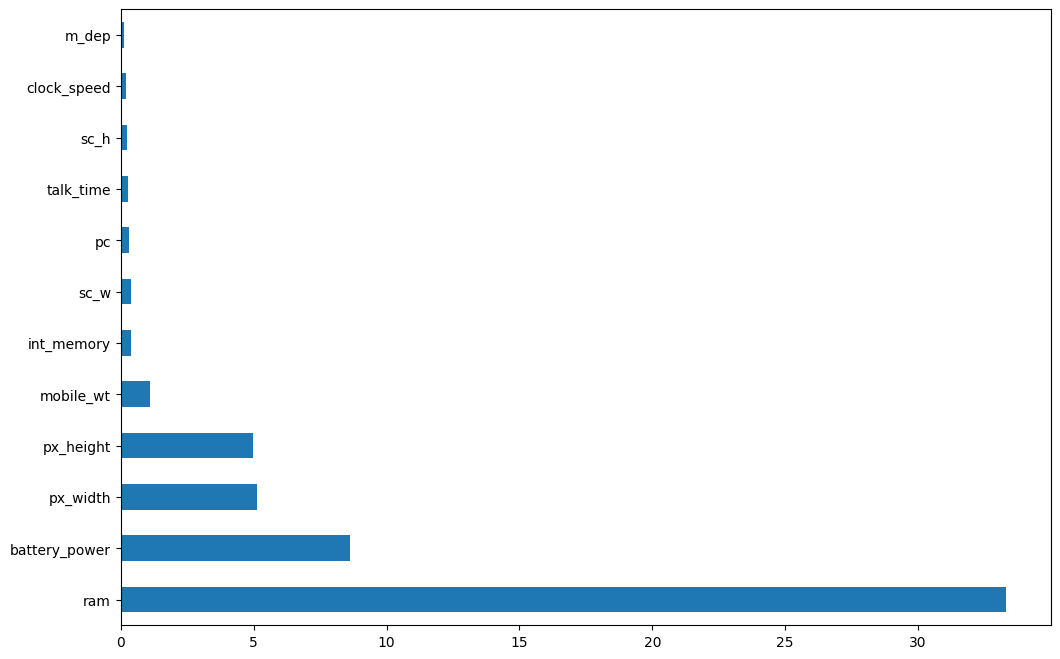

In [194]:
plt.figure(figsize=(12,8))
pd.Series(abs(svm_optimal.coef_[0])+abs(svm_optimal.coef_[1])+abs(svm_optimal.coef_[2])+abs(svm_optimal.coef_[3]), index=X_train.columns).nlargest(12).plot(kind='barh')

**Observations**:

The initial model showed high accuracy on the train set (98%) but a lower accuracy on the test set (94%).

After hyperparameter tuning, the train accuracy remained relatively high (98%), but the test accuracy improved significantly to 97%. This indicates that the model's performance has improved, and it is now better at generalizing to new data.

Among the different algorithms tested, SVM performed the best in terms of accuracy.

The feature importance analysis revealed that RAM, battery power, px_height, and px_width are the most important features for the model's predictions.
The f1 score, which measures the model's precision and recall, for each individual class is also high, indicating good performance in classifying each class accurately.

The area under the curve (AUC) for each class prediction is almost 1, suggesting that the model has high discriminatory power and is effective at distinguishing between different classes.

In summary, the tuned SVM model has shown improved performance with reduced overfitting, high accuracy, and good performance metrics across various evaluation measures. The identified important features can provide insights into the factors influencing the model's predictions.

# **Final Observations from the Predictive Modeling:**

**1. Observations of Decision Tree Classifier:**

Before hyperparameter tuning, the model showed perfect training accuracy (100%) but lower test accuracy (84%). This indicates overfitting.

After hyperparameter tuning, the model's training accuracy decreased to 97% while the test accuracy improved to 86%. However, the model is still not suitable for our purposes.

RAM, battery power, px_height, and px_width emerged as the most important features. The model performed well in classifying class 0 and class 3, with AUC scores of around 0.96. However, its performance for class 1 and class 2 was lower, with an AUC score of 0.88.


**2. Observations of Random Forest:**

Before hyperparameter tuning, the model exhibited perfect training accuracy (100%) but lower test accuracy (89%). This suggests overfitting.

After hyperparameter tuning, the model's training accuracy remained at 100%, and the test accuracy improved slightly to 90%. The overfitting was slightly reduced. However, the model still struggles to classify class 1 and class 2 effectively, as indicated by the ROC curve.


**3. Observations of Gradient Boost Classifiers:**

Prior to hyperparameter tuning, the model achieved perfect training accuracy (100%) but lower test accuracy (92%). Overfitting was observed.

After hyperparameter tuning, the model's training accuracy remained at 100%, and the test accuracy  to 92%. However, the model is not the best-performing one. It demonstrated good classification for class 0 and class 3, with high recall rates of 96% and 90%, respectively, as evident from the ROC curve and classification report.


**4. Observations of K Nearest Neighbors:**

Before hyperparameter tuning, the model yielded a training accuracy of 78% and a test accuracy of 61%, indicating poor performance.

After hyperparameter tuning, the model's training accuracy improved to 76%, and the test accuracy increased to 65%. While there was an improvement, the model is still not suitable for our needs.


**5. Observations of XGBoost Classifier:**

Before hyperparameter tuning, the model achieved a training accuracy of 100% and a test accuracy of 92%.

After hyperparameter tuning, the model's training accuracy remained at 100%, and the test accuracy  to 92%. However, there is no difference between the train and test accuracies, suggesting slight overfitting.

The model performed well in predicting class 0 and class 3, as indicated by the AUC-ROC curve.


**6.Observations of SVM:**
Before Hyperparameter Tuning

Train Accuarcy = 98%

Test Accuarcy = 94%

After Hyperparameter Tuning

Train Accuarcy = 98%

Test Accuarcy = 97%

SVM performed very well as compared to other alogorithms. In terms of feature importance RAM,Battery power,px_height and px_weight are the imporatant features. f1 score for individual classes is also very good. Area under curve for each class prediction is also almost 1.

In summary, after hyperparameter tuning, some models showed improved performance with reduced overfitting, higher test accuracy, and improved class predictions. However, there is still room for further improvement in model performance, particularly in correctly classifying class 1 and class 2. The importance of specific features varied across models.

# **Conclusion**

1. The project started with data understanding, data wrangling, and basic exploratory data analysis (EDA) to uncover relationships and trends between the price range and other independent variables.

2. The feature importance  selection method is employed to select the most relevant features for predictive modeling.

3. Several classification algorithms were implemented, and after hyperparameter tuning, the Support Vector Machine (SVM) algorithm exhibited the best performance with 98% train accuracy and 97% test accuracy. XGBoost was the second-best performing model with 100% train accuracy and 92.2% test accuracy.
However, the K Nearest Neighbors (KNN) algorithm resulted in poor model performance.


**Hurrah! You have successfully completed your Machine Learning Capstone Project !!!**